## Summary

1. Data Preparation
    1. Data Cleaning
2. Scaling Data
    1. MinMaxScaler
    2. StandardScaler
    3. Normalizer
3. Feature Selection
    1. Random Forests for permutation Feature Selection
    2. Lasso Feature Selection
4. Model Selection and Evaluation
    1. RF feature selection SVR validated
    2. Lasso Feautre selection SVR validated
5. Truth Plots 

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import seaborn as sns

pd.options.display.max_columns = None
plt.style.use("fivethirtyeight")
plt.rcParams["figure.dpi"] = 150

In [340]:
X_train, X_ivs, y_train, col_names = pickle.load(open("../data/drd2_data.pickle", "rb"))

In [341]:
df = pd.DataFrame(X_train, columns=col_names)
print(df.shape)
df.head()

(7337, 2132)


D00       D01   D02   D03   D04   D05   D06    D07    D08   D09  \
0   541.280138   541.656  10.0   1.0   8.0   1.0  10.0   40.0   75.0  10.0   
1   426.197714   426.582   5.0   1.0   9.0   1.0   4.0   30.0   60.0   6.0   
2   348.183778   348.446   4.0   0.0   3.0   0.0   3.0   26.0   50.0   4.0   
3  1455.763803  1456.831  27.0  19.0  23.0  17.0  16.0  105.0  206.0  28.0   
4   387.151368   387.886   4.0   0.0   4.0   0.0   4.0   27.0   50.0   6.0   

   D10       D11   D12  D13  D14  D15  D16  D17  D18  D19  D20  D21   D22  \
0  0.0  0.366667   6.0  5.0  1.0  1.0  4.0  3.0  1.0  1.0  0.0  0.0   0.0   
1  0.0  0.333333   3.0  3.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   1.0   
2  0.0  0.363636   4.0  2.0  2.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   1.0   
3  8.0  0.454545  10.0  7.0  3.0  2.0  5.0  3.0  2.0  2.0  0.0  0.0  12.0   
4  0.0  0.428571   4.0  2.0  2.0  1.0  2.0  1.0  1.0  1.0  0.0  0.0   1.0   

   D23         D24     D25      D26       D27        D28        D29  \
0  0.0  231.488913   92.94  3.05150  157.2168  23.031669  13.918232   
1  0.0  179.173066   62.40  5.06700  121.4485  18.868877  11.924618   
2  1.0  154.056480   41.90  4.34520  102.5950  15.149717   9.339378   
3  0.0  615.328380  420.92  2.83877  404.3975  60.413438  37.662847   
4  1.0  163.495895   36.44  3.83150  105.0585  15.960053   9.892722   

         D30        D31        D32        D33        D34        D35  \
0   8.076785   8.076785   5.801320  23.031669  13.918232   8.076785   
1   7.288243   7.288243   4.537164  18.052380  10.272353   5.555996   
2   5.227266   5.227266   3.910611  15.149717   9.339378   5.227266   
3  21.277605  21.277605  15.539352  59.596941  36.508147  20.077699   
4   5.811508   5.811508   4.211670  15.204124   9.514758   5.587930   

         D36        D37   D38        D39        D40        D41        D42  \
0   8.076785   5.801320 -4.31  25.940585  10.689861   4.577007   6.932531   
1   5.555996   3.631044 -2.57  22.122775   9.493882   4.766210   7.001034   
2   5.227266   3.910611 -2.62  16.827325   7.321446   3.641782   4.738475   
3  20.077699  14.535672 -9.87  77.735944  38.232130  21.871193  28.304864   
4   5.587930   4.099881 -1.98  18.386415   7.947481   4.143126   5.412062   

   FP0000  FP0001  FP0002  FP0003  FP0004  FP0005  FP0006  FP0007  FP0008  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   FP0009  FP0010  FP0011  FP0012  FP0013  FP0014  FP0015  FP0016  FP0017  \
0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   FP0018  FP0019  FP0020  FP0021  FP0022  FP0023  FP0024  FP0025  FP0026  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   

   FP0027  FP0028  FP0029  FP0030  FP0031  FP0032  FP0033  FP0034  FP0035  \
0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0

## Data Cleaning 

In [343]:
# null values
df.isna().sum().sum()

0

In [344]:
# check for duplicated values
df.duplicated().sum()

321

In [345]:
dup_mask = df.duplicated()

In [346]:
df.drop_duplicates(inplace=True)
X_train = X_train[~dup_mask]
X_train = pd.DataFrame(X_train, columns=col_names)


y_train = y_train[~dup_mask]

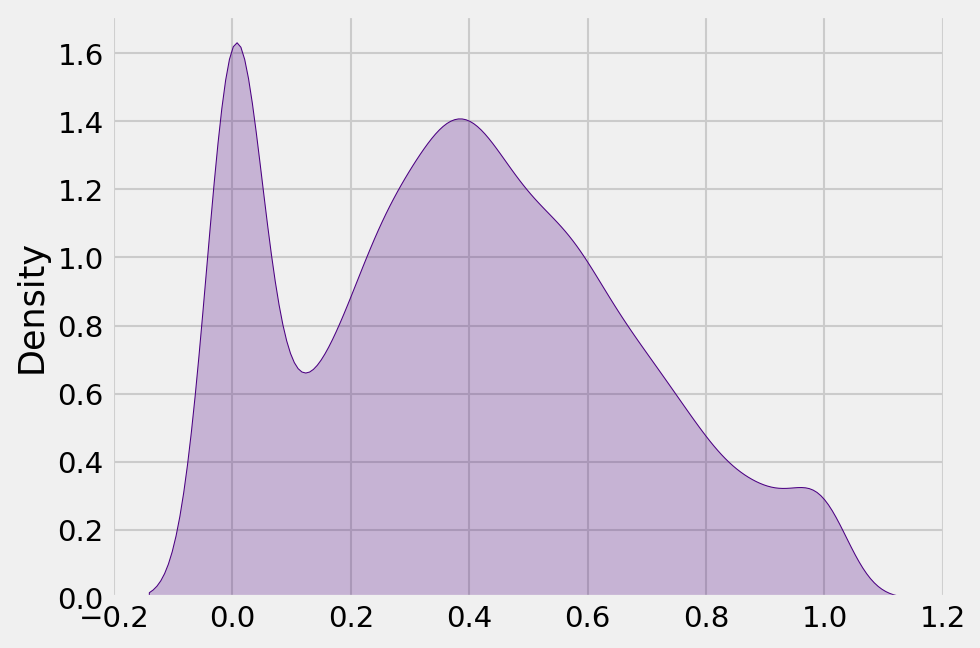

In [347]:
sns.kdeplot(y_train, fill=True, color="indigo")
plt.show()

In [350]:
## FP cols
df[[col for col in df.columns if "FP" in col]].shape[1]

2089

In [349]:
## Checking if every FP column is binary
(df[[col for col in df.columns if "FP" in col]].nunique() == 2).sum()

2089

# Scaling

- MinMaxScaler
- StandardScaler
- Normalizer


In [351]:
from sklearn.model_selection import train_test_split

X_train_simpcv, X_val_simpcv, y_train_simpcv, y_val_simpcv = train_test_split(
    df, y_train, test_size=0.2, random_state=42
)

### this cell takes 15 min to run on i5-10400F CPU @ 2.90GHz, 16 Gb ram
## Testing different scalers without scaling the Fingerprints 

In [353]:
from tqdm.notebook import tqdm
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    PowerTransformer,
    Normalizer,
)
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer

# from sklearn.decomposition import PCA     # with/without pca

models = [
    LinearRegression(),
    Ridge(),
    RandomForestRegressor(),
    SVR(),
]

scalers = [MinMaxScaler(), StandardScaler(), Normalizer()]
results = []

FP_cols = [col for col in df.columns if "FP" in col]
D_cols = [col for col in df.columns if "D" in col]

ct = ColumnTransformer(
    [("scaler", MinMaxScaler(), D_cols)],
    remainder="passthrough",
    verbose_feature_names_out=True,
)


for scaler in tqdm(scalers):
    ct.set_params(scaler=scaler)
    X_train_sc = ct.fit_transform(X_train_simpcv)
    X_val_sc = ct.transform(X_val_simpcv)

    for model in models:
        model.fit(X_train_sc, y_train_simpcv)
        y_pred = model.predict(X_val_sc)
        y_train_pred = model.predict(X_train_sc)
        result = {
            "model": model.__class__.__name__,
            "scaler": scaler.__class__.__name__,
            "train_mse": mean_squared_error(y_train_pred, y_train_simpcv),
            "test_mse": mean_squared_error(y_val_simpcv, y_pred),
            "train_rmse": np.sqrt(mean_squared_error(y_train_pred, y_train_simpcv)),
            "test_rmse": np.sqrt(mean_squared_error(y_val_simpcv, y_pred)),
            "train_evs": explained_variance_score(y_train_pred, y_train_simpcv),
            "test_evs": explained_variance_score(y_val_simpcv, y_pred),
        }
        results.append(result)

results_df = pd.DataFrame(results)
results_df.to_csv("../data/results.csv")

  0%|          | 0/3 [00:00<?, ?it/s]

In [363]:
results_df = pd.read_csv("../data/results.csv")
results_df.drop(columns=["Unnamed: 0"], inplace=True)

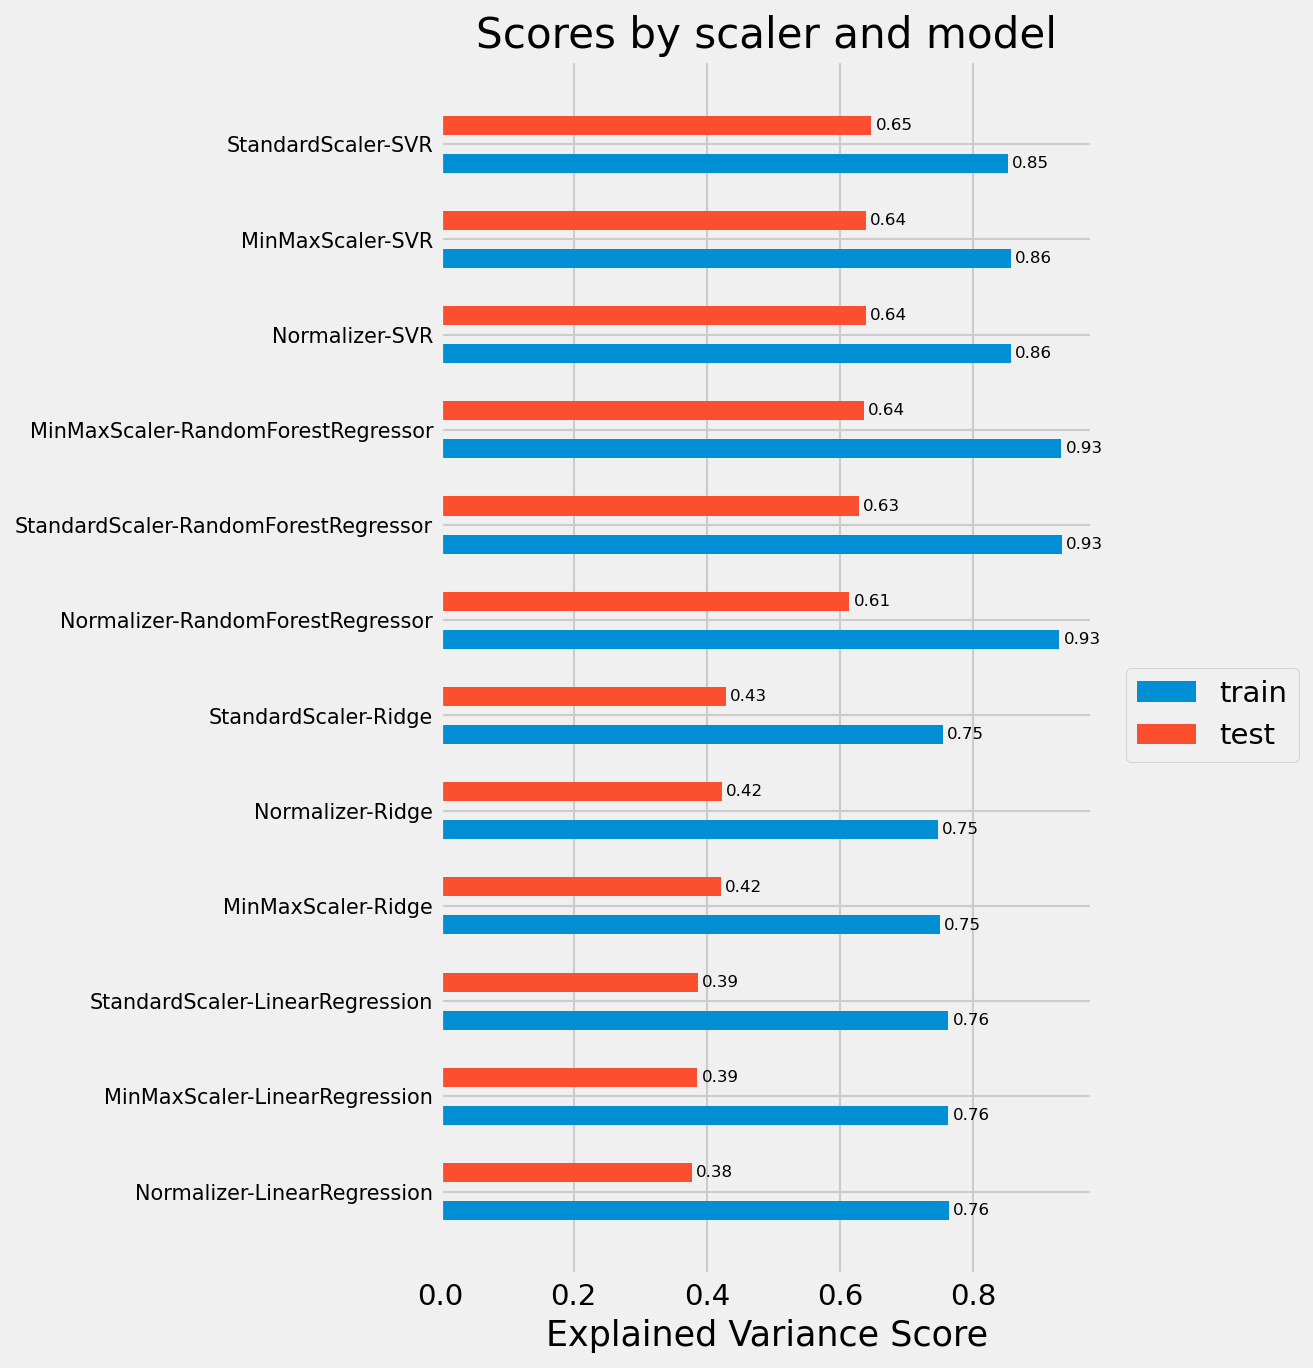

In [364]:
sorted_df = (
    results_df[["scaler", "model", "train_evs", "test_evs"]]
    .sort_values(["test_evs"])
    .copy()
)

y_labels = [
    (s, m)
    for s, m in zip(
        sorted_df.to_dict()["scaler"].values(), sorted_df.to_dict()["model"].values()
    )
]
y_labels = [f"{i[0]}-{i[1]}" for i in y_labels]

y = np.arange(len(sorted_df))
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(5, 10))

rects1 = ax.barh(y - width, sorted_df["train_evs"], width, label="train")
rects2 = ax.barh(y + width, sorted_df["test_evs"], width, label="test")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Explained Variance Score")
ax.set_title("Scores by scaler and model")
ax.set_yticks(y)
ax.set_yticklabels(y_labels, fontsize=10)
ax.legend(bbox_to_anchor=(1.05, 0.5), loc="upper left", borderaxespad=0.0)
ax.bar_label(
    rects1,
    fmt="%.2f",
    label_type="edge",
    fontsize=8,
    padding=2,
)
ax.bar_label(rects2, fmt="%.2f", label_type="edge", fontsize=8, padding=2)

plt.show()

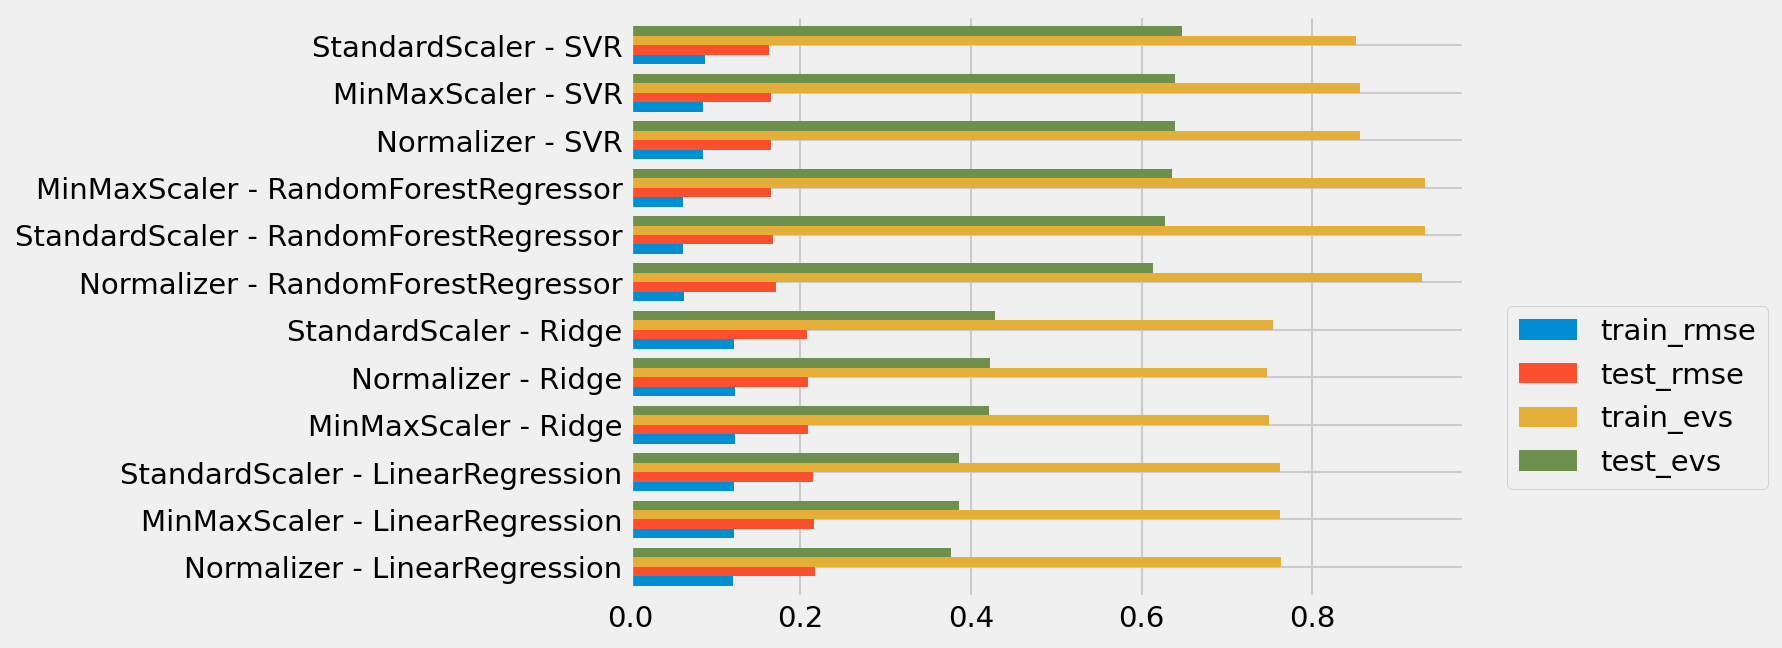

In [384]:
to_plot = (
    results_df.groupby(["scaler", "model"])
    .mean()
    .sort_values(["test_rmse"], ascending=False)[
        ["train_rmse", "test_rmse", "train_evs", "test_evs"]
    ]
    .copy()
)

# Reset the index
to_plot = to_plot.reset_index()

# Create a new column for the labels
to_plot["label"] = to_plot["scaler"] + " - " + to_plot["model"]

# Plot the data using the 'label' column for the y-labels
to_plot.set_index("label")[
    ["train_rmse", "test_rmse", "train_evs", "test_evs"]
].plot.barh(width=0.8)
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc="upper left", borderaxespad=0.0)
plt.savefig("../figs/first_results.png", bbox_inches="tight")
plt.show()

### USING -- StandardScaler

In [20]:
from tqdm.notebook import tqdm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score

models = [
    LinearRegression(),
    Ridge(),
    RandomForestRegressor(),
    SVR(),
]

results = []

for model in tqdm(models):
    model.fit(X_train_sc, y_train_simpcv)
    y_pred = model.predict(X_val_sc)
    y_train_pred = model.predict(X_train_sc)
    result = {
        "model": model.__class__.__name__,
        "train_rmse": np.sqrt(mean_squared_error(y_train_pred, y_train_simpcv)),
        "test_rmse": np.sqrt(mean_squared_error(y_val_simpcv, y_pred)),
        "train_evs": explained_variance_score(y_train_pred, y_train_simpcv),
        "test_evs": explained_variance_score(y_val_simpcv, y_pred),
    }
    results.append(result)

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
pca_1000_dims_df = pd.DataFrame(results)
pca_1000_dims_df.to_csv("../data/pca_1000_dims.csv")

In [14]:
pca_1000_dims_df = pd.read_csv("../data/pca_1000_dims.csv")
pca_1000_dims_df.drop(columns=["Unnamed: 0"], inplace=True)
pca_1000_dims_df

model  train_rmse  test_rmse  train_evs  test_evs
0       LinearRegression    0.154138   0.187098   0.552848  0.536093
1                  Ridge    0.154140   0.186928   0.550978  0.536934
2  RandomForestRegressor    0.072102   0.190187   0.893944  0.520524
3                    SVR    0.089943   0.161551   0.848345  0.654038

## Feature Importances

# Random Forest Feature Importance
- how much the tree nodes that use that feature reduce impurity on average,
across all trees in the forest
- permutation score

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, make_scorer
from sklearn.model_selection import GridSearchCV


metrics = {
    "rmse": make_scorer(mean_squared_error, squared=False),
    "evs": make_scorer(explained_variance_score),
}

param_grid = {
    "max_features": [100, 500, 1000, 1500, 2132],
    "n_estimators": [50, 100, 200, 500, 1000],
}

cv = GridSearchCV(
    RandomForestRegressor(oob_score=True, n_jobs=-1),
    param_grid=param_grid,
    cv=5,
    scoring=metrics,
    refit="rmse",
    verbose=2,
    return_train_score=True,
)

results = cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ..................max_features=100, n_estimators=50; total time=   4.6s
[CV] END ..................max_features=100, n_estimators=50; total time=   1.9s
[CV] END ..................max_features=100, n_estimators=50; total time=   1.8s
[CV] END ..................max_features=100, n_estimators=50; total time=   1.8s
[CV] END ..................max_features=100, n_estimators=50; total time=   2.0s
[CV] END .................max_features=100, n_estimators=100; total time=   3.5s
[CV] END .................max_features=100, n_estimators=100; total time=   3.4s
[CV] END .................max_features=100, n_estimators=100; total time=   3.3s
[CV] END .................max_features=100, n_estimators=100; total time=   3.3s
[CV] END .................max_features=100, n_estimators=100; total time=   3.4s
[CV] END .................max_features=100, n_estimators=200; total time=   6.2s
[CV] END .................max_features=100, n_e

In [133]:
# save cv_results

with open("../data/RF_grid.pkl", "wb") as fp:
    pickle.dump(results, fp)
    print("dictionary saved successfully to file")

dictionary saved successfully to file


In [140]:
RF_grid = pd.DataFrame(results.cv_results_)
RF_grid.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.478876      1.079546         0.034650        0.001593   
1       3.435039      0.059939         0.040814        0.001997   
2       6.442894      0.115805         0.065819        0.015985   
3      15.402297      0.138546         0.110305        0.002326   
4      30.493051      0.198801         0.194385        0.001790   

  param_max_features param_n_estimators  \
0                100                 50   
1                100                100   
2                100                200   
3                100                500   
4                100               1000   

                                        params  split0_test_rmse  \
0    {'max_features': 100, 'n_estimators': 50}          0.165113   
1   {'max_features': 100, 'n_estimators': 100}          0.162461   
2   {'max_features': 100, 'n_estimators': 200}          0.161894   
3   {'max_features': 100, 'n_estimators': 500}          0.161305   
4  {'max_features': 100, 'n_estimators': 1000}          0.161416   

   split1_test_rmse  split2_test_rmse  split3_test_rmse  split4_test_rmse  \
0          0.167371          0.168300          0.166300          0.172793   
1          0.166407          0.167699          0.166219          0.169787   
2          0.165585          0.165543          0.165459          0.168521   
3          0.166311          0.165568          0.165349          0.169353   
4          0.165520          0.166001          0.165108          0.168682   

   mean_test_rmse  std_test_rmse  rank_test_rmse  split0_train_rmse  \
0        0.167975       0.002634               1           0.064700   
1        0.166515       0.002394               4           0.063500   
2        0.165400       0.002102              10           0.062418   
3        0.165577       0.002573               9           0.061855   
4        0.165345       0.002328              11           0.061640   

   split1_train_rmse  split2_train_rmse  split3_train_rmse  split4_train_rmse  \
0           0.064838           0.064399           0.064441           0.063913   
1           0.063327           0.062568           0.062410           0.062590   
2           0.061769           0.061504           0.062256           0.061318   
3           0.061605           0.061326           0.061563           0.060887   
4           0.061520           0.061061           0.061311           0.060724   

   mean_train_rmse  std_train_rmse  split0_test_evs  split1_test_evs  \
0         0.064458        0.000318         0.625421         0.638038   
1         0.062879        0.000444         0.637352         0.642301   
2         0.061853        0.000424         0.640024         0.645708   
3         0.061447        0.000326         0.642693         0.642718   
4         0.061251        0.000329         0.642204         0.646062   

   split2_test_evs  split3_test_evs  split4_test_evs  mean_test_evs  \
0         0.643142         0.640436         0.611044       0.631616   
1         0.645641         0.640864         0.624260       0.638083   
2         0.654735         0.644253         0.629941       0.642932   
3         0.654625         0.644780         0.626260       0.642215   
4         0.652822         0.645768         0.629130       0.643197   

   std_test_evs  rank_test_evs  split0_train_evs  split1_train_evs  \
0      0.011945             25          0.946074          0.945013   
1      0.007406             22          0.948050          0.947553   
2      0.008074             16          0.949810          0.950099   
3      0.009117             17          0.950714          0.950365   
4      0.007827             15          0.951054          0.950502   

   split2_train_evs  split3_train_evs  split4_train_evs  mean_train_evs  \
0          0.945401          0.945766          0.946701        0.945791   
1          0.948470          0.949117          0.948873        0.948412   
2          0.950200          0.949365          0.

In [159]:
RF_grid[
    [
        "param_max_features",
        "param_n_estimators",
        "mean_train_rmse",
        "mean_test_rmse",
        "mean_train_evs",
        "mean_test_evs",
    ]
].sort_values(["mean_test_evs"], ascending=False).round(3)

param_max_features param_n_estimators  mean_train_rmse  mean_test_rmse  \
14               1000               1000            0.061           0.164   
19               1500               1000            0.061           0.164   
13               1000                500            0.061           0.164   
18               1500                500            0.061           0.164   
9                 500               1000            0.061           0.164   
24               2132               1000            0.061           0.165   
17               1500                200            0.062           0.165   
12               1000                200            0.062           0.165   
7                 500                200            0.062           0.165   
8                 500                500            0.061           0.165   
22               2132                200            0.062           0.165   
23               2132                500            0.061           0.165   
16               1500                100            0.062           0.165   
11               1000                100            0.062           0.165   
4                 100               1000            0.061           0.165   
2                 100                200            0.062           0.165   
3                 100                500            0.061           0.166   
15               1500                 50            0.064           0.166   
6                 500                100            0.063           0.166   
21               2132                100            0.063           0.166   
10               1000                 50            0.064           0.166   
1                 100                100            0.063           0.167   
5                 500                 50            0.064           0.167   
20               2132                 50            0.064           0.167   
0                 100                 50            0.064           0.168   

    mean_train_evs  mean_test_evs  
14           0.952          0.648  
19           0.952          0.648  
13           0.952          0.648  
18           0.951          0.648  
9            0.951          0.647  
24           0.951          0.646  
17           0.951          0.646  
12           0.951          0.645  
7            0.950          0.645  
8            0.951          0.645  
22           0.950          0.645  
23           0.951          0.644  
16           0.949          0.644  
11           0.949          0.644  
4            0.951          0.643  
2            0.950          0.643  
3            0.951          0.642  
15           0.947          0.641  
6            0.949          0.640  
21           0.949          0.640  
10           0.946          0.640  
1            0.948          0.638  
5            0.946          0.637  
20           0.947          0.637  
0            0.946          0.632

<Axes: xlabel='param_max_features', ylabel='mean_test_evs'>

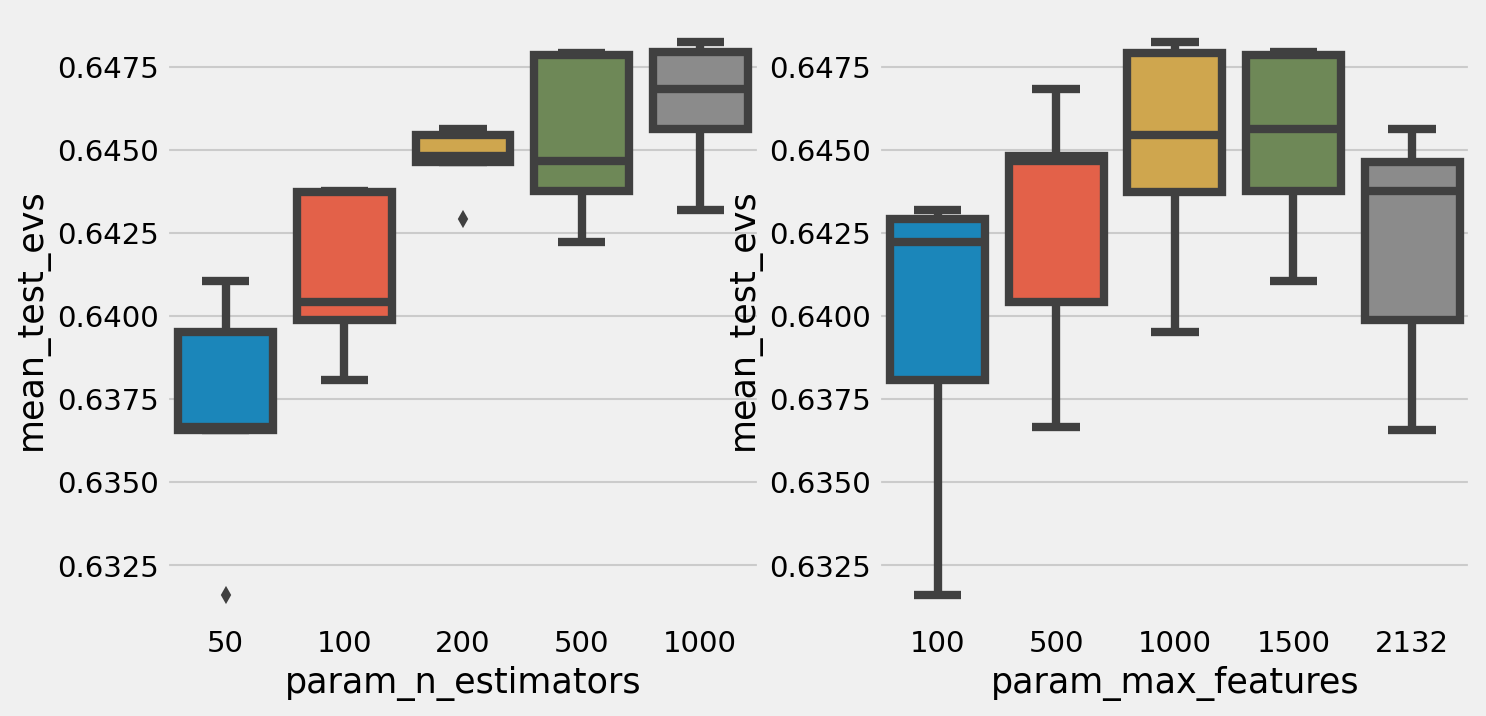

In [162]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(data=RF_grid, x="param_n_estimators", y="mean_test_evs", ax=axs[0])
sns.boxplot(data=RF_grid, x="param_max_features", y="mean_test_evs", ax=axs[1])

<Axes: xlabel='param_max_features', ylabel='mean_test_rmse'>

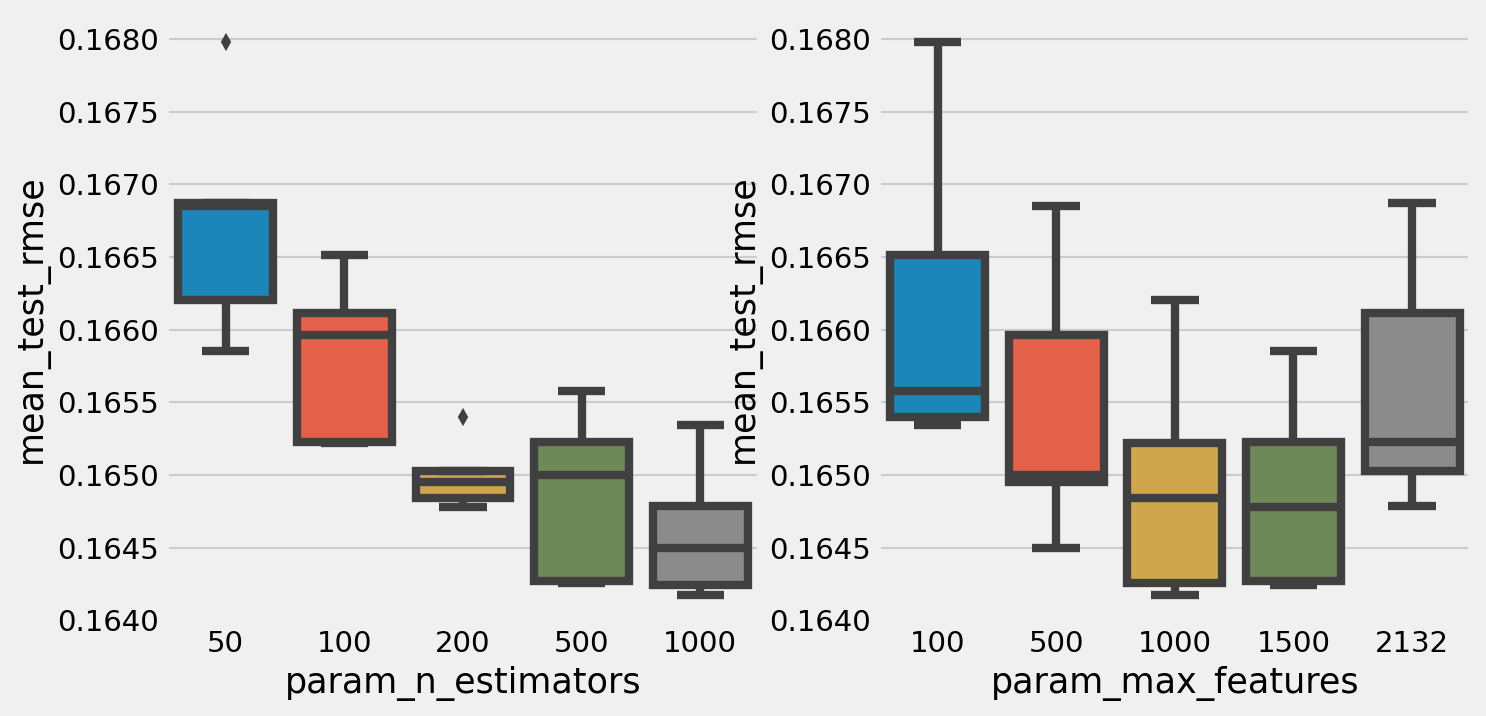

In [187]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(data=RF_grid, x="param_n_estimators", y="mean_test_rmse", ax=axs[0])
sns.boxplot(data=RF_grid, x="param_max_features", y="mean_test_rmse", ax=axs[1])

In [206]:
metrics = {
    "rmse": make_scorer(mean_squared_error, squared=False),
    "evs": make_scorer(explained_variance_score),
}

param_grid = {
    "max_features": [100, 500, 1000, 1500, 2132],
    "n_estimators": [1300, 1500],
}

cv_more = GridSearchCV(
    RandomForestRegressor(oob_score=True, n_jobs=-2),
    param_grid=param_grid,
    cv=5,
    scoring=metrics,
    refit="rmse",
    verbose=3,
    return_train_score=True,
)

results_more = cv_more.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_features=100, n_estimators=1300; evs: (train=0.951, test=0.644) rmse: (train=0.062, test=0.161) total time=  41.5s
[CV 2/5] END max_features=100, n_estimators=1300; evs: (train=0.951, test=0.643) rmse: (train=0.061, test=0.166) total time=  40.2s
[CV 3/5] END max_features=100, n_estimators=1300; evs: (train=0.951, test=0.653) rmse: (train=0.061, test=0.166) total time=  35.8s
[CV 4/5] END max_features=100, n_estimators=1300; evs: (train=0.951, test=0.647) rmse: (train=0.061, test=0.165) total time=  35.3s
[CV 5/5] END max_features=100, n_estimators=1300; evs: (train=0.952, test=0.629) rmse: (train=0.061, test=0.169) total time=  35.2s
[CV 1/5] END max_features=100, n_estimators=1500; evs: (train=0.951, test=0.643) rmse: (train=0.062, test=0.161) total time=  40.8s
[CV 2/5] END max_features=100, n_estimators=1500; evs: (train=0.951, test=0.644) rmse: (train=0.061, test=0.166) total time=  44.4s
[CV 3/5] END ma

In [207]:
with open("../data/RF_grid_more.pkl", "wb") as fp:
    pickle.dump(results_more, fp)
    print("dictionary saved successfully to file")

dictionary saved successfully to file


In [209]:
RF_grid_more = pd.DataFrame(results_more.cv_results_)
RF_grid_more.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      37.511636      2.681262         0.208336        0.015790   
1      43.286690      1.407144         0.249628        0.028673   
2     117.374046      3.578190         0.221703        0.016632   
3     130.611109      2.085540         0.226407        0.005400   
4     199.743330      3.509110         0.193717        0.006052   

  param_max_features param_n_estimators  \
0                100               1300   
1                100               1500   
2                500               1300   
3                500               1500   
4               1000               1300   

                                         params  split0_test_rmse  \
0   {'max_features': 100, 'n_estimators': 1300}          0.161031   
1   {'max_features': 100, 'n_estimators': 1500}          0.161164   
2   {'max_features': 500, 'n_estimators': 1300}          0.159959   
3   {'max_features': 500, 'n_estimators': 1500}          0.160039   
4  {'max_features': 1000, 'n_estimators': 1300}          0.159241   

   split1_test_rmse  split2_test_rmse  split3_test_rmse  split4_test_rmse  \
0          0.166192          0.165867          0.164779          0.168696   
1          0.166053          0.165698          0.165274          0.169133   
2          0.164810          0.164857          0.164953          0.168041   
3          0.164910          0.164962          0.164663          0.167897   
4          0.164695          0.164862          0.164769          0.167301   

   mean_test_rmse  std_test_rmse  rank_test_rmse  split0_train_rmse  \
0        0.165313       0.002496               2           0.061760   
1        0.165464       0.002545               1           0.061773   
2        0.164524       0.002592               5           0.061612   
3        0.164494       0.002524               6           0.061419   
4        0.164173       0.002654               9           0.061413   

   split1_train_rmse  split2_train_rmse  split3_train_rmse  split4_train_rmse  \
0           0.061424           0.060938           0.061188           0.060529   
1           0.061429           0.061046           0.060952           0.060664   
2           0.061167           0.060832           0.061041           0.060436   
3           0.061083           0.060733           0.060932           0.060380   
4           0.061105           0.060668           0.060909           0.060229   

   mean_train_rmse  std_train_rmse  split0_test_evs  split1_test_evs  \
0         0.061168        0.000419         0.643850         0.643181   
1         0.061173        0.000387         0.643266         0.643791   
2         0.061017        0.000387         0.648593         0.649307   
3         0.060909        0.000347         0.648214         0.648813   
4         0.060865        0.000401         0.651758         0.649867   

   split2_test_evs  split3_test_evs  split4_test_evs  mean_test_evs  \
0         0.653358         0.647193         0.629242       0.643365   
1         0.654061         0.645028         0.627199       0.642669   
2         0.657542         0.646233         0.631998       0.646735   
3         0.657100         0.647515         0.632665       0.646862   
4         0.657501         0.647009         0.635157       0.648258   

   std_test_evs  rank_test_evs  split0_train_evs  split1_train_evs  \
0      0.007928              9          0.950865          0.950656   
1      0.008675             10          0.950844          0.950648   
2      0.008298              6          0.951107          0.951078   
3      0.007905              5          0.951414          0.951209   
4      0.007396              2          0.951424          0.951178   

   split2_train_evs  split3_train_evs  split4_train_evs  mean_train_evs  \
0          0.951113          0.951089          0.952192        0.951183   
1          0.950941          0.951468          0.951975        0.951175   
2          0.951290          0.951335      

In [11]:
RF_grid = pd.read_csv("../data/RF_grid.csv")
RF_grid_more = pd.read_csv("../data/RF_grid_more.csv")

RF_grid_all = pd.concat([RF_grid, RF_grid_more])
RF_grid_all.shape

(35, 38)

In [196]:
RF_grid_more[
    ["param_max_features", "param_n_estimators", "mean_test_evs", "mean_train_evs"]
]

param_max_features  param_n_estimators  mean_test_evs  mean_train_evs
0                 100                1300       0.643365        0.951183
1                 100                1500       0.642669        0.951175
2                 500                1300       0.646735        0.951430
3                 500                1500       0.646862        0.951600
4                1000                1300       0.648258        0.951674
5                1000                1500       0.648151        0.951688
6                1500                1300       0.647908        0.951643
7                1500                1500       0.648345        0.951694
8                2132                1300       0.646062        0.951128
9                2132                1500       0.645663        0.951190

<Axes: xlabel='param_max_features', ylabel='mean_test_rmse'>

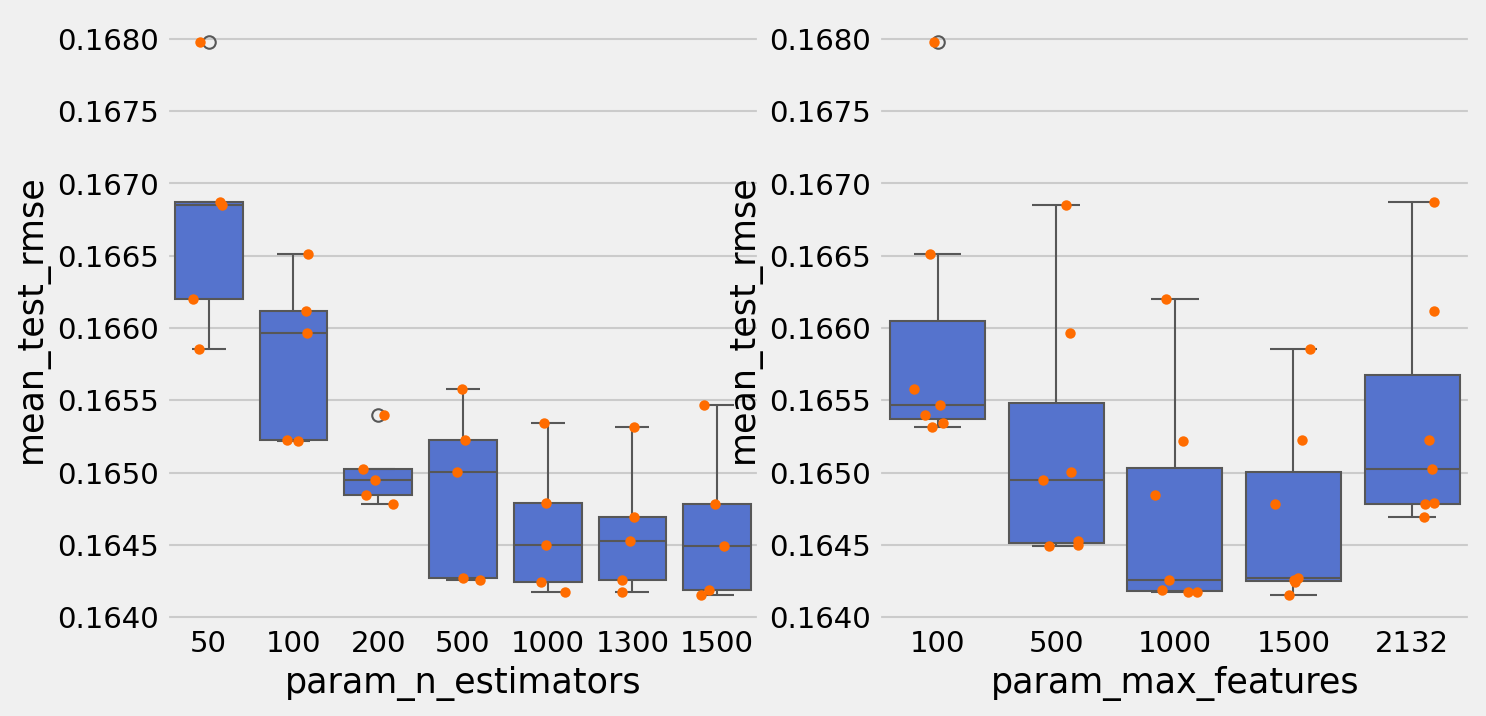

In [390]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.stripplot(
    data=RF_grid_all,
    x="param_n_estimators",
    y="mean_test_rmse",
    ax=axs[0],
    jitter=0.2,
    c="#FF6C00",
)
sns.stripplot(
    data=RF_grid_all,
    x="param_max_features",
    y="mean_test_rmse",
    ax=axs[1],
    jitter=0.2,
    c="#FF6C00",
)
sns.boxplot(
    data=RF_grid_all,
    x="param_n_estimators",
    y="mean_test_rmse",
    ax=axs[0],
    color="royalblue",
)
sns.boxplot(
    data=RF_grid_all,
    x="param_max_features",
    y="mean_test_rmse",
    ax=axs[1],
    color="royalblue",
)

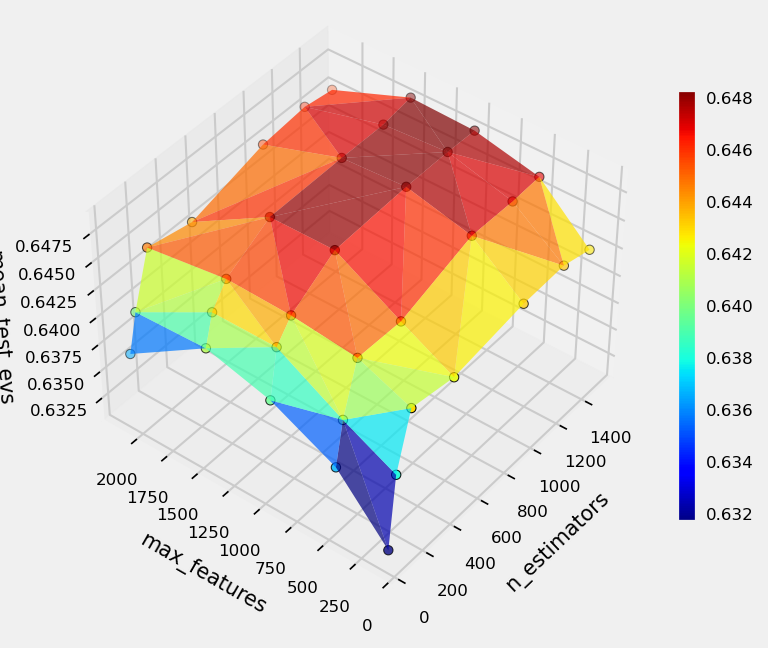

In [15]:
# 3d plot of optimal parameters

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    RF_grid_all["param_n_estimators"],
    RF_grid_all["param_max_features"],
    RF_grid_all["mean_test_evs"],
    c=RF_grid_all["mean_test_evs"],
    cmap="jet",
    edgecolor="k",
)
ax.plot_trisurf(
    RF_grid_all["param_n_estimators"],
    RF_grid_all["param_max_features"],
    RF_grid_all["mean_test_evs"],
    cmap=plt.cm.jet,
    linewidth=0.8,
    alpha=0.7,
)

ax.set_xlabel("n_estimators", fontsize=10)
ax.set_ylabel("max_features", fontsize=10)
ax.set_zlabel("mean_test_evs", fontsize=10)

ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
ax.zaxis.set_tick_params(labelsize=8)
ax.zaxis.labelpad = 5
ax.view_init(42, -142)

cbar = plt.colorbar(ax.collections[0], fraction=0.026, pad=0.04)
cbar.ax.tick_params(labelsize=8)

plt.savefig("../figs/RF_grid_search.png", dpi=150, bbox_inches="tight", pad_inches=0.7)

plt.show()

We reach a plateau at 500 estimators and 1000 features

Calculating feature importance based on permutation to avoid cardinality Bias

In [124]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train_simpcv, X_val_simpcv, y_train_simpcv, y_val_simpcv = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(n_estimators=500, max_features=1000, n_jobs=-1)
rf.fit(X_train_simpcv, y_train_simpcv)

result = permutation_importance(
    rf, X_val_simpcv, y_val_simpcv, n_repeats=10, random_state=42, n_jobs=-1
)

In [125]:
# save result
with open("../data/permutation_importance.pkl", "wb") as fp:
    pickle.dump(result, fp)
    print("dictionary saved successfully to file")

dictionary saved successfully to file


In [133]:
result = pickle.load(open("../data/permutation_importance.pkl", "rb"))

In [144]:
importances_unbiased = pd.DataFrame(result["importances"], index=col_names).T
importances_unbiased.head()

D00       D01       D02       D03       D04       D05       D06  \
0  0.002444  0.001592  0.001064  0.001886  0.001546  0.002757  0.001621   
1  0.002062  0.001761  0.001042  0.001772  0.001966  0.003109  0.000704   
2  0.002618  0.002008  0.001170  0.003065  0.002141  0.004569  0.001008   
3  0.002978  0.002289  0.000752  0.002786  0.002191  0.003357  0.000799   
4  0.002765  0.001444  0.001195  0.002160  0.001932  0.002430  0.001273   

        D07       D08       D09       D10       D11       D12       D13  \
0  0.000687  0.001876  0.001328  0.001596  0.009962  0.000609  0.000747   
1  0.000439  0.001717  0.001686  0.001477  0.006813  0.000735  0.000477   
2  0.000707  0.002062  0.001136  0.001376  0.008900  0.000661  0.000443   
3  0.000456  0.001662  0.001012  0.001363  0.008286  0.000816  0.000907   
4  0.000545  0.001896  0.001189  0.001194  0.010498  0.000572  0.000640   

        D14       D15       D16       D17       D18       D19       D20  \
0  0.000747  0.000762  0.000619  0.000676  0.000311  0.000491  0.000116   
1  0.000595  0.000743  0.000471  0.000861  0.000300  0.000274  0.000053   
2  0.000446  0.000684  0.000013  0.000465  0.000430  0.000517  0.000088   
3  0.000483  0.000764  0.000234  0.000443  0.000417  0.000386  0.000190   
4  0.000077  0.000552  0.000283  0.000873  0.000167  0.000416  0.000134   

        D21       D22       D23       D24       D25       D26       D27  \
0  0.000035  0.001316  0.000278  0.003908  0.008847  0.012352  0.012175   
1  0.000050  0.001146  0.001003  0.003477  0.007609  0.006025  0.008673   
2  0.000061  0.001638  0.000682  0.004779  0.007566  0.012350  0.013161   
3 -0.000008  0.001776  0.000566  0.004599  0.007814  0.007432  0.012140   
4  0.000074  0.001857  0.001312  0.004623  0.008633  0.010319  0.011965   

        D28       D29       D30       D31       D32       D33       D34  \
0  0.004823  0.005699  0.005720  0.005694  0.019570  0.002014  0.004431   
1  0.004228  0.004621  0.005395  0.005887  0.017165  0.001481  0.003699   
2  0.005103  0.005999  0.005382  0.005393  0.017052  0.002380  0.004947   
3  0.005138  0.005753  0.006795  0.007080  0.022093  0.002167  0.004577   
4  0.005206  0.006024  0.006154  0.007022  0.018816  0.001793  0.004500   

        D35       D36       D37       D38       D39       D40       D41  \
0  0.004464  0.006370  0.012370  0.005055  0.001619  0.004195  0.003944   
1  0.003685  0.005401  0.010040  0.005088  0.001242  0.002867  0.003624   
2  0.005425  0.007268  0.014863  0.005700  0.001893  0.002793  0.003527   
3  0.005139  0.007539  0.011830  0.005082  0.002420  0.002774  0.004047   
4  0.004742  0.006783  0.012252  0.005796  0.001869  0.003356  0.003306   

        D42    FP0000    FP0001    FP0002    FP0003    FP0004    FP0005  \
0  0.003130  0.000026 -0.000034  0.000022  0.000017  0.000058 -0.000074   
1  0.002859  0.000061  0.000062  0.000020  0.000029  0.000074 -0.000121   
2  0.002481 -0.000072  0.000024  0.000018  0.000027  0.000109 -0.000138   
3  0.003443 -0.000083  0.000043  0.000024  0.000033  0.000096 -0.000044   
4  0.003115  0.000027  0.000036  0.000011 -0.000023  0.000076 -0.000121   

     FP0006    FP0007    FP0008    FP0009    FP0010    FP0011    FP0012  \
0  0.000019  0.000029  0.000306  0.001708  0.000071  0.000061  0.000121   
1  0.000148  0.000129  0.000106  0.001941  0.000050  0.000031  0.000103   
2  0.000165  0.000186  0.000203  0.001600  0.000137  0.000031  0.000144   
3  0.000243  0.000075  0.000276  0.002445  0.000174  0.000031  0.000154   
4  0.000200  0.000256  0.000329  0.001869  0.000158  0.000022  0.000154   

     FP0013    FP0014    FP0015    FP0016    FP0017    FP0018    FP0019  \
0  0.000040  0.000068 -0.000003  0.000074  0.000157  0.000010  0.000288   
1  0.000063  0.000058  0.000023  0.000007  0.000152  0.000006  0.000353   
2  0.000042  0.000074 -0.000023  0.000205  0.000309  0.000011  0.000373   
3  0.000091  0.000073  0.000001  0.000037  0.000055  0.000003  0.000383   
4  0.000067  0.000050 -0.

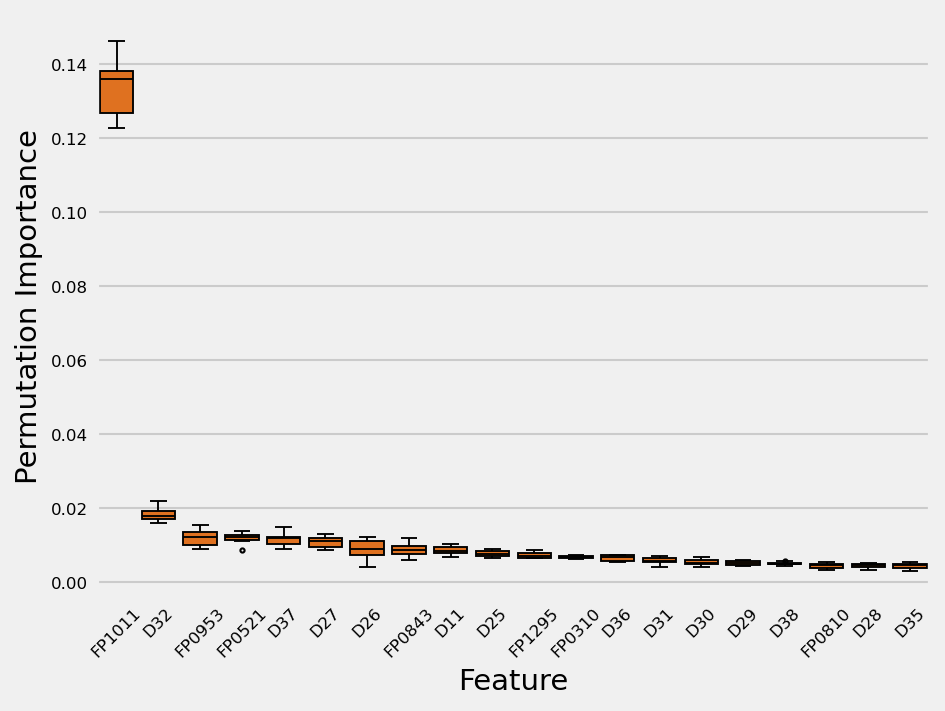

In [401]:
top_idx = importances_unbiased.mean().sort_values(ascending=False).head(20).index

sns.boxplot(
    importances_unbiased.loc[:, top_idx],
    linewidth=0.9,
    color="#FF6C00",
    linecolor="k",
    fliersize=2,
)
plt.xlabel("Feature", fontsize=14)
plt.xticks(ticks=range(0, len(top_idx)), labels=top_idx, fontsize=8, rotation=45)
plt.ylabel("Permutation Importance", fontsize=14)
plt.yticks(fontsize=8)
plt.savefig("../figs/feature_importances.png", dpi=150, bbox_inches="tight")
plt.show()

In [166]:
importances_unbiased.mean().sort_values(ascending=False).head(20)

FP1011    0.134138
D32       0.018504
FP0953    0.012162
FP0521    0.012045
D37       0.011615
D27       0.011002
D26       0.009038
FP0843    0.008912
D11       0.008654
D25       0.007888
FP1295    0.007436
FP0310    0.006900
D36       0.006637
D31       0.005914
D30       0.005504
D29       0.005273
D38       0.005137
FP0810    0.004536
D28       0.004520
D35       0.004445
dtype: float64

## Optimized SVM growingly combining every top feature untill the 100th

In [195]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.metrics import (
    mean_squared_error,
    explained_variance_score,
    r2_score,
    make_scorer,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

metrics = {
    "rmse": make_scorer(mean_squared_error, squared=False),
    "evs": make_scorer(explained_variance_score),
    "r2": make_scorer(r2_score),
}

D_cols = [col for col in df.columns if "D" in col]

ct = ColumnTransformer(
    [("scaler", StandardScaler(), make_column_selector(pattern="^D"))],
    remainder="passthrough",
    verbose_feature_names_out=True,
)

pipe = make_pipeline(
    ct,
    SVR(kernel="rbf", gamma=0.01, C=1, epsilon=0.01),
)

top_idx = importances_unbiased.mean().sort_values(ascending=False).head(200).index

cvs_perm = []

for i in range(1, len(top_idx) + 1):
    selection = top_idx[:i]

    cv_result = cross_validate(
        pipe,
        X_train.loc[:, selection],
        y_train,
        cv=5,
        scoring=metrics,
        n_jobs=-1,
        verbose=3,
        return_train_score=True,
    )

    cvs_perm.append(cv_result)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.1s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.3s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.8s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.5s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parall

In [197]:
cvs_perm_df = pd.concat([pd.DataFrame(cv) for cv in cvs_perm])
cvs_perm_df.to_csv("../data/RF_validation_200feats.csv")

In [203]:
# mean for every 5 rows
First200 = cvs_perm_df.groupby(np.arange(len(cvs_perm_df)) // 5).mean().copy()
First200["n_features"] = np.arange(1, 201)

<Axes: xlabel='n_features', ylabel='test_evs'>

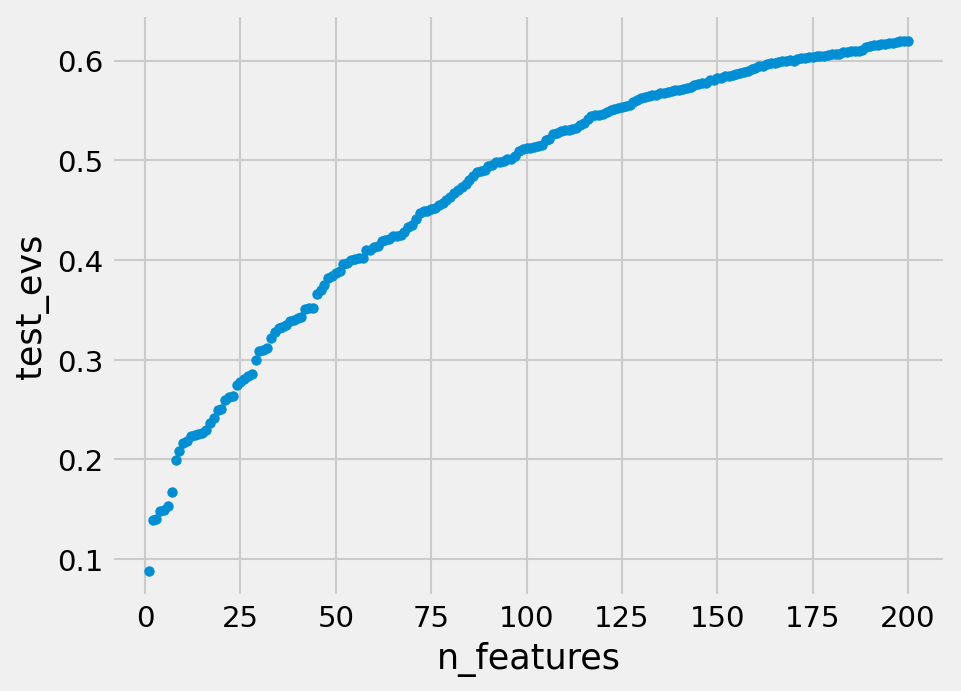

In [204]:
First200.plot.scatter(x="n_features", y="test_evs")

## Features subset from 200 - 300

In [206]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.metrics import (
    mean_squared_error,
    explained_variance_score,
    r2_score,
    make_scorer,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

metrics = {
    "rmse": make_scorer(mean_squared_error, squared=False),
    "evs": make_scorer(explained_variance_score),
    "r2": make_scorer(r2_score),
}

D_cols = [col for col in df.columns if "D" in col]

ct = ColumnTransformer(
    [("scaler", StandardScaler(), make_column_selector(pattern="^D"))],
    remainder="passthrough",
    verbose_feature_names_out=True,
)

pipe = make_pipeline(
    ct,
    SVR(kernel="rbf", gamma=0.01, C=1, epsilon=0.01),
)

top_idx = importances_unbiased.mean().sort_values(ascending=False).head(300).index

cvs_perm_200_300 = []

for i in range(200, len(top_idx) + 1):
    selection = top_idx[:i]

    cv_result = cross_validate(
        pipe,
        X_train.loc[:, selection],
        y_train,
        cv=5,
        scoring=metrics,
        n_jobs=-1,
        verbose=3,
        return_train_score=True,
    )

    cvs_perm_200_300.append(cv_result)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.0s remaining:   48.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   31.9s remaining:   47.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.6s remaining:   43.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.7s remaining:   40.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parall

In [208]:
cvs_perm_200_300_df = pd.concat([pd.DataFrame(cv) for cv in cvs_perm_200_300])
cvs_perm_200_300_df.to_csv("../data/RF_validation_200_300feats.csv")

In [215]:
Last200_300 = (
    cvs_perm_200_300_df.groupby(np.arange(len(cvs_perm_200_300_df)) // 5).mean().copy()
)
Last200_300["n_features"] = np.arange(200, 301)

In [214]:
# First and last
SVM_val_RF_perms = pd.concat([First100, Last200_300])
SVM_val_RF_perms.to_csv("../data/SVM_val_RF_perms.csv")

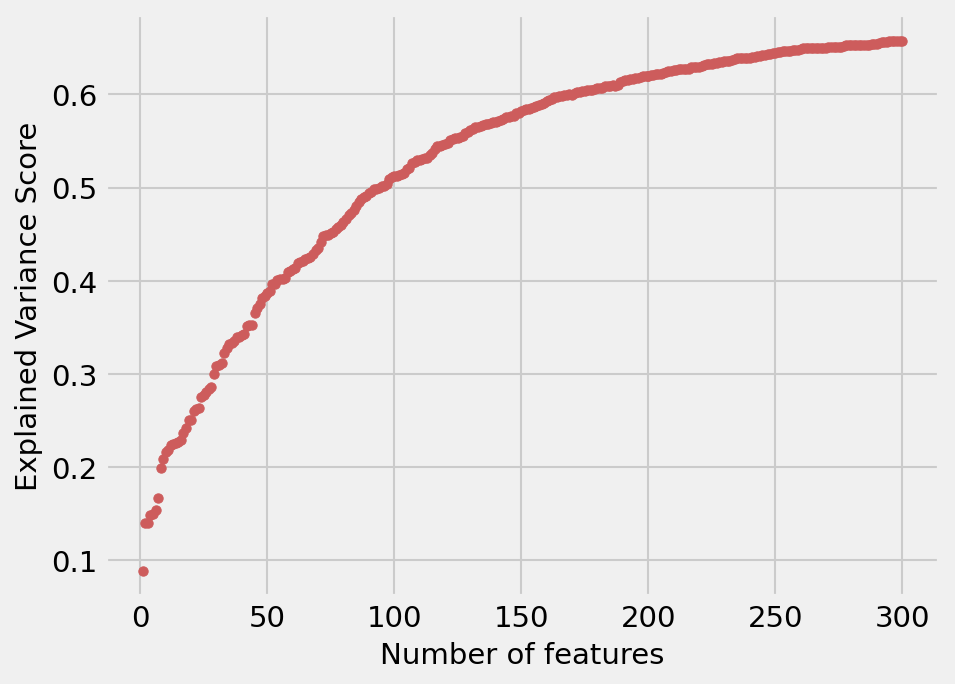

In [399]:
SVM_val_RF_perms.plot.scatter(x="n_features", y="test_evs", color="indianred")
plt.xlabel("Number of features", fontsize=14)
plt.ylabel("Explained Variance Score", fontsize=14)
plt.savefig("../figs/SVM_val_RF_perms.png", dpi=150, bbox_inches="tight")

In [253]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.metrics import (
    mean_squared_error,
    explained_variance_score,
    r2_score,
    make_scorer,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

metrics = {
    "rmse": make_scorer(mean_squared_error, squared=False),
    "evs": make_scorer(explained_variance_score),
    "r2": make_scorer(r2_score),
}

D_cols = [col for col in df.columns if "D" in col]

ct = ColumnTransformer(
    [("scaler", StandardScaler(), make_column_selector(pattern="^D"))],
    remainder="passthrough",
    verbose_feature_names_out=True,
)

pipe = make_pipeline(
    ct,
    SVR(),
)

top_idx = importances.mean().sort_values(ascending=False).head(500).index

cvs = []

for i in range(1, len(top_idx) + 1):
    selection = top_idx[:i]

    cv_result = cross_validate(
        pipe,
        X_train.loc[:, selection],
        y_train,
        cv=5,
        scoring=metrics,
        n_jobs=-1,
        return_train_score=True,
    )

    cvs.append(cv_result)

In [264]:
# concat all dfs in cvs list
cvs_df = pd.concat([pd.DataFrame(cv) for cv in cvs])
cvs_df.drop(columns=["fit_time", "score_time"], inplace=True)
cvs_df.to_csv("../data/SVR_feature_selection.csv")

In [409]:
# groupby every 5 rows and get mean
cvs_df = pd.read_csv("../data/SVR_feature_selection.csv")
cvs_grouped = cvs_df.groupby(np.arange(len(cvs_df)) // 5).mean().round(3)

Text(0, 0.5, 'EVS')

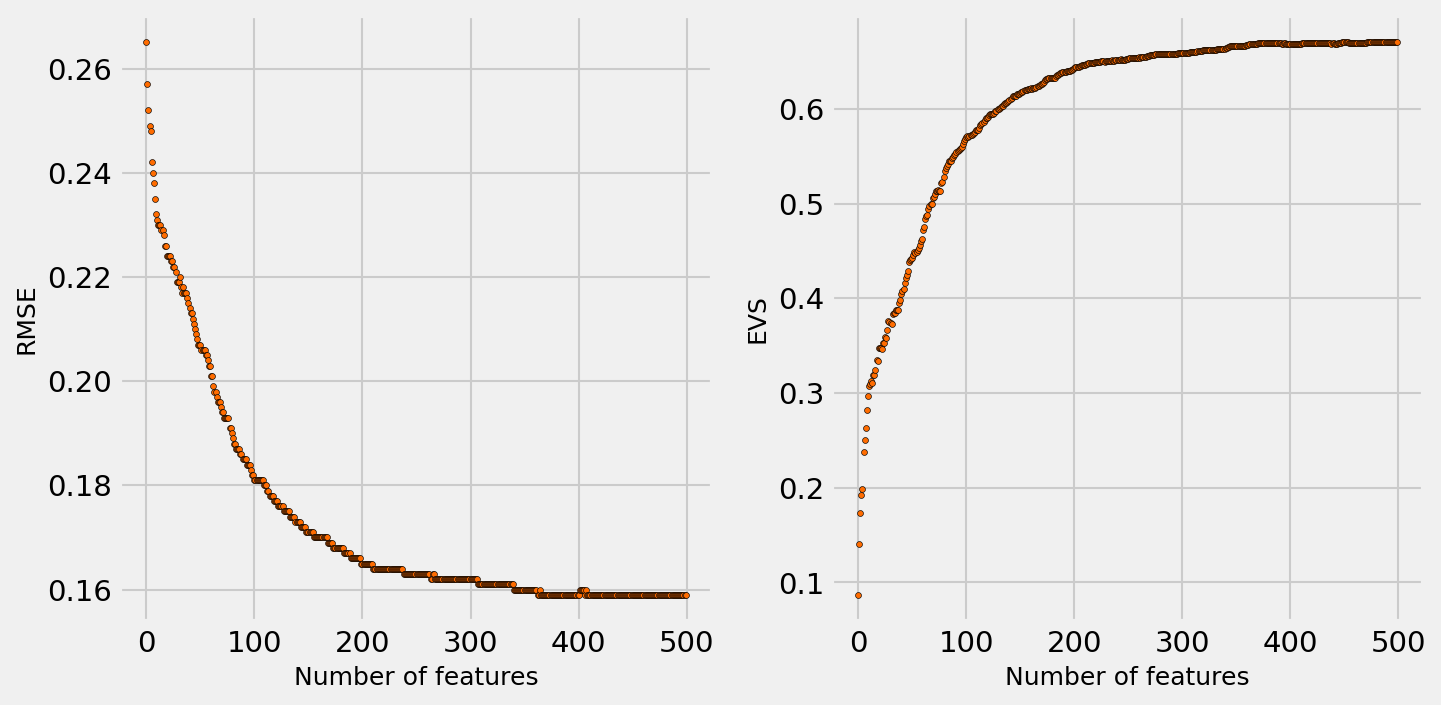

In [411]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    range(0, cvs_grouped.shape[0]),
    cvs_grouped["test_rmse"],
    label="test_rmse",
    s=8,
    c="#FF6C00",
    edgecolors="k",
    linewidth=0.3,
)
# plt.title("RMSE by number of features", fontsize=15)
plt.xlabel("Number of features", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(
    range(0, cvs_grouped.shape[0]),
    cvs_grouped["test_evs"],
    label="test_evs",
    s=8,
    c="#FF6C00",
    edgecolors="k",
    linewidth=0.3,
)
# plt.title("EVS by number of features", fontsize=15)
plt.xlabel("Number of features", fontsize=12)
plt.ylabel("EVS", fontsize=12)

Adding more variables

In [319]:
metrics = {
    "rmse": make_scorer(mean_squared_error, squared=False),
    "evs": make_scorer(explained_variance_score),
    "r2": make_scorer(r2_score),
}

D_cols = [col for col in df.columns if "D" in col]

ct = ColumnTransformer(
    [("scaler", StandardScaler(), make_column_selector(pattern="^D"))],
    remainder="passthrough",
    verbose_feature_names_out=True,
)

pipe = make_pipeline(
    ct,
    SVR(),
)

top_idx = importances.mean().sort_values(ascending=False).head(1000).index

cvs_more = []


for i in range(500, len(top_idx) + 1):
    selection = top_idx[:i]

    cv_result = cross_validate(
        pipe,
        X_train.loc[:, selection],
        y_train,
        cv=5,
        scoring=metrics,
        n_jobs=-1,
        verbose=2,
        return_train_score=True,
    )

    cvs_more.append(cv_result)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   30.9s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   29.9s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   28.4s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   28.9s remaining:   19.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parall

In [321]:
cvs_more_df = pd.concat([pd.DataFrame(cv) for cv in cvs_more])
cvs_more_df.drop(columns=["fit_time", "score_time"], inplace=True)
cvs_more_df.to_csv("../data/SVR_feature_selection_more.csv")

In [326]:
cvs_more_grouped = cvs_more_df.groupby(np.arange(len(cvs_more_df)) // 5).mean().round(4)
cvs_more_grouped

test_rmse  train_rmse  test_evs  train_evs  test_r2  train_r2
0       0.1589      0.1007    0.6704     0.8677   0.6699    0.8677
1       0.1588      0.1007    0.6706     0.8678   0.6702    0.8678
2       0.1588      0.1006    0.6709     0.8681   0.6705    0.8680
3       0.1588      0.1006    0.6708     0.8681   0.6703    0.8680
4       0.1588      0.1005    0.6707     0.8682   0.6703    0.8682
..         ...         ...       ...        ...      ...       ...
496     0.1585      0.0913    0.6720     0.8913   0.6716    0.8912
497     0.1585      0.0913    0.6719     0.8913   0.6714    0.8912
498     0.1585      0.0913    0.6722     0.8914   0.6717    0.8912
499     0.1585      0.0913    0.6722     0.8914   0.6717    0.8913
500     0.1584      0.0913    0.6724     0.8914   0.6720    0.8913

[501 rows x 6 columns]

In [333]:
cvs_grouped_all = pd.concat([cvs_grouped, cvs_more_grouped])
cvs_grouped_all.to_csv("../data/SVR_feature_selection_all.csv")
cvs_grouped_all

test_rmse  train_rmse  test_evs  train_evs  test_r2  train_r2
0       0.2650      0.2650    0.0870     0.0880   0.0850    0.0860
1       0.2570      0.2560    0.1410     0.1480   0.1370    0.1450
2       0.2520      0.2510    0.1730     0.1820   0.1690    0.1790
3       0.2490      0.2450    0.1920     0.2190   0.1890    0.2160
4       0.2480      0.2430    0.1990     0.2320   0.1950    0.2300
..         ...         ...       ...        ...      ...       ...
496     0.1585      0.0913    0.6720     0.8913   0.6716    0.8912
497     0.1585      0.0913    0.6719     0.8913   0.6714    0.8912
498     0.1585      0.0913    0.6722     0.8914   0.6717    0.8912
499     0.1585      0.0913    0.6722     0.8914   0.6717    0.8913
500     0.1584      0.0913    0.6724     0.8914   0.6720    0.8913

[1001 rows x 6 columns]

In [405]:
cvs_grouped_all = pd.read_csv("../data/SVR_feature_selection_all.csv")

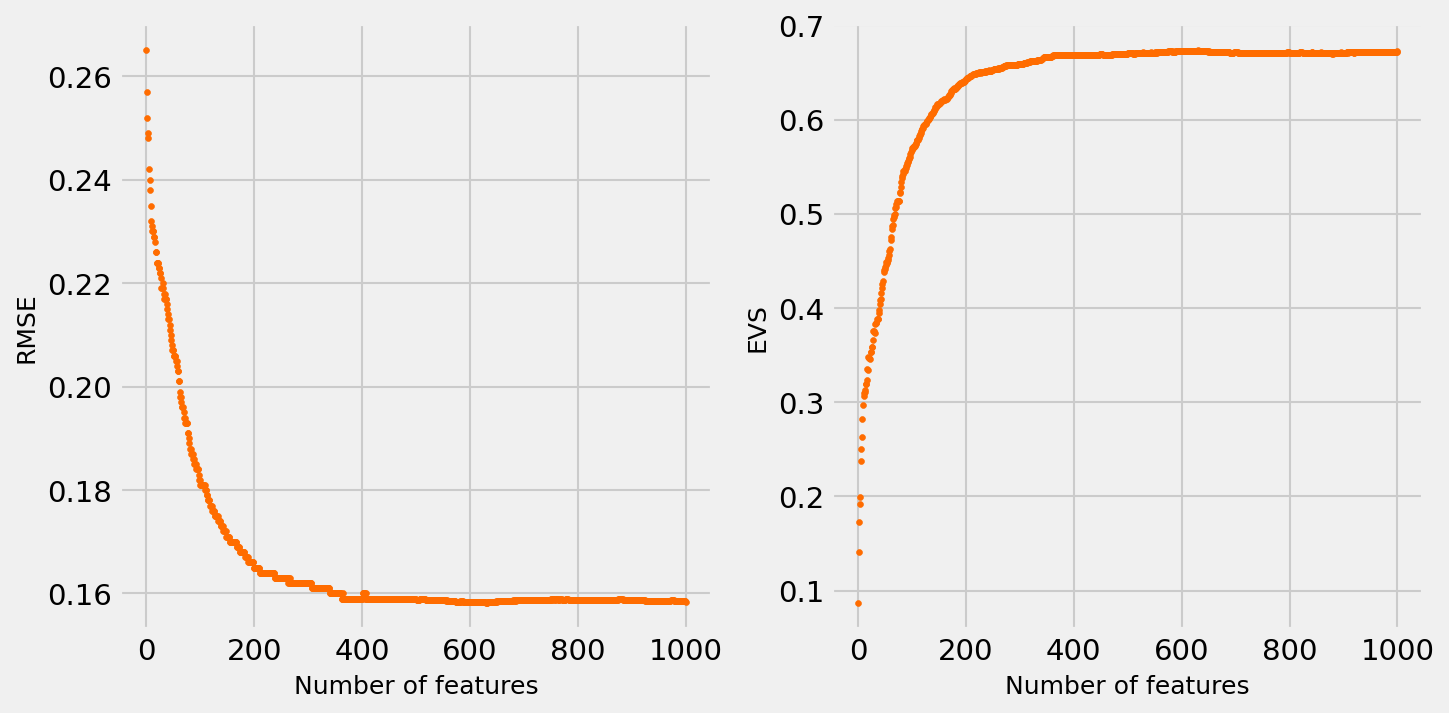

In [416]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    range(0, cvs_grouped_all.shape[0]),
    cvs_grouped_all["test_rmse"],
    label="test_rmse",
    s=8,
    c="#FF6C00",
    linewidth=0.3,
)
# plt.title("RMSE by number of features", fontsize=15)
plt.xlabel("Number of features", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(
    range(0, cvs_grouped_all.shape[0]),
    cvs_grouped_all["test_evs"],
    label="test_evs",
    s=8,
    c="#FF6C00",
    linewidth=0.3,
)
# plt.title("EVS by number of features", fontsize=15)
plt.xlabel("Number of features", fontsize=12)
plt.ylabel("EVS", fontsize=12)
plt.savefig("../figs/SVR_features_validation.png", dpi=150, bbox_inches="tight")
plt.show()

# Lasso 

In [233]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline

alphas = np.logspace(-4, 1, 20)
coefs_list = []

ct = ColumnTransformer(
    [("scaler", StandardScaler(), make_column_selector(pattern="^D"))],
    remainder="passthrough",
    verbose_feature_names_out=True,
)

pipe = Pipeline([("ct", ct), ("lasso", Lasso(max_iter=10000))])

for alpha in alphas:
    pipe.steps[1][1].set_params(alpha=alpha)
    pipe.fit(X_train, y_train)
    coefs = pipe.steps[1][1].coef_
    coefs_list.append(coefs)

In [473]:
coef_df = pd.DataFrame(coefs_list, columns=col_names)
coef_df["alpha"] = alphas

coef_df

D00       D01  D02  D03       D04       D05       D06  D07  D08  \
0  -0.057661 -0.002540 -0.0 -0.0 -0.001814  0.071073  0.064427 -0.0 -0.0   
1  -0.005976 -0.001096 -0.0 -0.0 -0.000000  0.041854  0.034513 -0.0 -0.0   
2  -0.000000 -0.000000 -0.0  0.0 -0.000000  0.029573  0.007441 -0.0 -0.0   
3  -0.000000 -0.000000 -0.0  0.0 -0.000000  0.024114  0.000000 -0.0 -0.0   
4  -0.000000 -0.000000 -0.0  0.0 -0.000000  0.019743 -0.000000 -0.0 -0.0   
5  -0.000000 -0.000000 -0.0  0.0  0.000000  0.015682 -0.000000 -0.0 -0.0   
6   0.000000  0.000000 -0.0  0.0  0.000000  0.007937 -0.000000 -0.0 -0.0   
7   0.000000  0.000000 -0.0  0.0  0.000000  0.000839 -0.000000  0.0  0.0   
8   0.000000  0.000000  0.0  0.0  0.000000  0.000000 -0.000000  0.0  0.0   
9   0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0   
10  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0   
11  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0   
12  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0   
13  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0   
14  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0   
15  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0   
16  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0   
17  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0   
18  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0   
19  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0   

         D09       D10       D11       D12  D13       D14  D15       D16  D17  \
0  -0.006482  0.033010  0.000000  0.028346  0.0  0.001620 -0.0 -0.002575 -0.0   
1  -0.004948  0.017918  0.000084  0.017466  0.0  0.000146 -0.0 -0.000232 -0.0   
2  -0.000000  0.006494  0.003420  0.012371  0.0  0.002366  0.0 -0.000000 -0.0   
3  -0.000000  0.000000  0.005304  0.001437  0.0  0.007705  0.0  0.000000  0.0   
4  -0.000000 -0.000000  0.005028  0.000000  0.0  0.006010  0.0  0.002897  0.0   
5  -0.000000 -0.000000  0.005123  0.000000  0.0  0.008178  0.0  0.000855  0.0   
6  -0.000000 -0.000000  0.009488  0.000000 -0.0  0.008005  0.0  0.000000 -0.0   
7  -0.000000 -0.000000  0.009516  0.000000 -0.0  0.003510  0.0 -0.000000 -0.0   
8   0.000000 -0.000000  0.004789  0.000000 -0.0  0.000000  0.0  0.000000 -0.0   
9   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000 -0.0   
10  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000 -0.0   
11  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000 -0.0   
12  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000 -0.0   
13  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000 -0.0   
14  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000 -0.0   
15  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000 -0.0   
16  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000 -0.0   
17  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000 -0.0   
18  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000 -0.0   
19  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000 -0.0   

         D18       D19       D20       D21       D22       D23  D24       D25  \
0   0.027953 -0.011117 -0.010176 -0.011865 -0.000000 -0.014917 -0.0 -0.064004   
1   0.022272 -0.005307 -0.011576 -0.010422 -0.003649 -0.015061 -0.0 -0.021381   
2   0.021147 -0.000000 -0.011678 -0.008762 -0.006142 -0.016299 -0.0 -0.000000   
3   0.016933  0.003907 -0.011271 -0.005844 -0.008693 -0.016776 -0.0 -0.000000   
4   0.013446  0.007468 -0.011047 -0.000930 -0.009108 -0.017143 -0.0 -0.000000   
5   0.013646  0.006372 -0.012964 -0.000000 -0.007760 -0.016479 -0.0 -0.000000   
6   0.007998  0.002848 -0.011588  0.000000 -0.001779 -0.013238 -0.0  0.000000   
7   0.005355  0.003153 -0.011007  0.000000 -0.000000 -0.009592

Text(0, 0.5, 'coefficients')

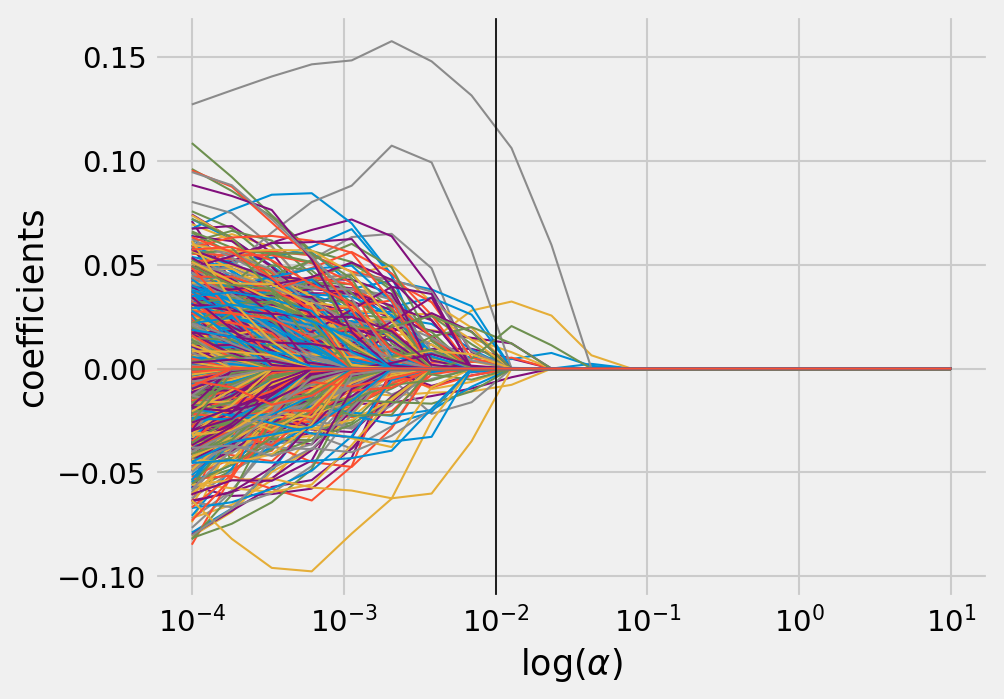

In [240]:
for col in coef_df.columns[:-1]:
    plt.plot(coef_df["alpha"], coef_df[col], linewidth=1)

plt.axvline(x=0.01, color="k", linestyle="-", linewidth=0.8)
plt.xscale("log")
plt.xlabel(r"log$(\alpha)$")
plt.ylabel("coefficients")

In [242]:
coef_df["alpha"]

0      0.000100
1      0.000183
2      0.000336
3      0.000616
4      0.001129
5      0.002069
6      0.003793
7      0.006952
8      0.012743
9      0.023357
10     0.042813
11     0.078476
12     0.143845
13     0.263665
14     0.483293
15     0.885867
16     1.623777
17     2.976351
18     5.455595
19    10.000000
Name: alpha, dtype: float64

In [260]:
coef_df.iloc[5, :].abs().drop("alpha").T.sort_values(ascending=False)

FP1011    0.157689
FP0843    0.107370
FP0009    0.064886
FP0244    0.063748
FP1825    0.062649
            ...   
FP0700    0.000000
FP0699    0.000000
FP0698    0.000000
FP0697    0.000000
FP2088    0.000000
Name: 5, Length: 2132, dtype: float64

In [303]:
n_feats = []
alphas = []
for i, alpha in zip(coef_df.index, coef_df["alpha"]):
    # non zero coefficients
    coefs_alpha = coef_df.iloc[i, :].abs().drop("alpha").T.sort_values(ascending=False)
    subset = coefs_alpha[coefs_alpha != 0]
    print(f"Alpha: {alpha:.4f} \t subset length: {len(subset)}")
    n_feats.append(len(subset))
    alphas.append(alpha)

Alpha: 0.0001 	 subset length: 1418
Alpha: 0.0002 	 subset length: 1112
Alpha: 0.0003 	 subset length: 769
Alpha: 0.0006 	 subset length: 457
Alpha: 0.0011 	 subset length: 271
Alpha: 0.0021 	 subset length: 153
Alpha: 0.0038 	 subset length: 75
Alpha: 0.0070 	 subset length: 39
Alpha: 0.0127 	 subset length: 13
Alpha: 0.0234 	 subset length: 4
Alpha: 0.0428 	 subset length: 3
Alpha: 0.0785 	 subset length: 0
Alpha: 0.1438 	 subset length: 0
Alpha: 0.2637 	 subset length: 0
Alpha: 0.4833 	 subset length: 0
Alpha: 0.8859 	 subset length: 0
Alpha: 1.6238 	 subset length: 0
Alpha: 2.9764 	 subset length: 0
Alpha: 5.4556 	 subset length: 0
Alpha: 10.0000 	 subset length: 0


In [276]:
metrics = {
    "rmse": make_scorer(mean_squared_error, squared=False),
    "evs": make_scorer(explained_variance_score),
    "r2": make_scorer(r2_score),
}

D_cols = [col for col in df.columns if "D" in col]

ct = ColumnTransformer(
    [("scaler", StandardScaler(), make_column_selector(pattern="^D"))],
    remainder="passthrough",
    verbose_feature_names_out=True,
)

pipe = make_pipeline(
    ct,
    SVR(kernel="rbf", gamma=0.01, C=1, epsilon=0.01),
)

lasso_results = []

for i in coef_df.index[:11]:
    # non zero coefficients
    coefs_alpha = coef_df.iloc[i, :].abs().drop("alpha").T.sort_values(ascending=False)
    subset = coefs_alpha[coefs_alpha != 0]
    selected_feats = subset.index

    cv_result = cross_validate(
        pipe,
        X_train.loc[:, selected_feats],
        y_train,
        cv=5,
        scoring=metrics,
        n_jobs=-1,
        return_train_score=True,
    )
    lasso_results.append(cv_result)

In [304]:
lasso_results_df = pd.concat([pd.DataFrame(cv) for cv in lasso_results])
lasso_cv = (
    lasso_results_df.groupby(np.arange(len(lasso_results_df)) // 5).mean().round(4)
)
lasso_cv["n_feats"] = n_feats[: lasso_cv.shape[0]]
lasso_cv["alpha"] = alphas[: lasso_cv.shape[0]]
lasso_cv.to_csv("../data/lasso_sel_cv.csv")
lasso_cv

fit_time  score_time  test_rmse  train_rmse  test_evs  train_evs  test_r2  \
0    73.6085     19.4275     0.1521      0.0572    0.6977     0.9573   0.6975   
1    61.6966     15.5327     0.1511      0.0673    0.7015     0.9408   0.7013   
2    43.6210     10.7608     0.1524      0.0876    0.6966     0.8998   0.6964   
3    26.8518      7.9561     0.1585      0.1130    0.6721     0.8336   0.6717   
4    14.9440      3.5250     0.1664      0.1361    0.6388     0.7588   0.6382   
5     8.0283      2.0272     0.1779      0.1572    0.5871     0.6780   0.5864   
6     5.2845      1.6993     0.1969      0.1855    0.4956     0.5524   0.4936   
7     2.9246      1.0564     0.2168      0.2097    0.3892     0.4286   0.3857   
8     2.0900      0.9239     0.2452      0.2423    0.2195     0.2374   0.2142   
9     1.8249      0.9152     0.2547      0.2541    0.1628     0.1665   0.1526   
10    1.8654      0.8866     0.2679      0.2672    0.0687     0.0724   0.0626   

    train_r2  n_feats     alpha  
0     0.9573     1418  0.000100  
1     0.9408     1112  0.000183  
2     0.8998      769  0.000336  
3     0.8334      457  0.000616  
4     0.7584      271  0.001129  
5     0.6775      153  0.002069  
6     0.5511       75  0.003793  
7     0.4263       39  0.006952  
8     0.2341       13  0.012743  
9     0.1575        4  0.023357  
10    0.0681        3  0.042813

<Axes: >

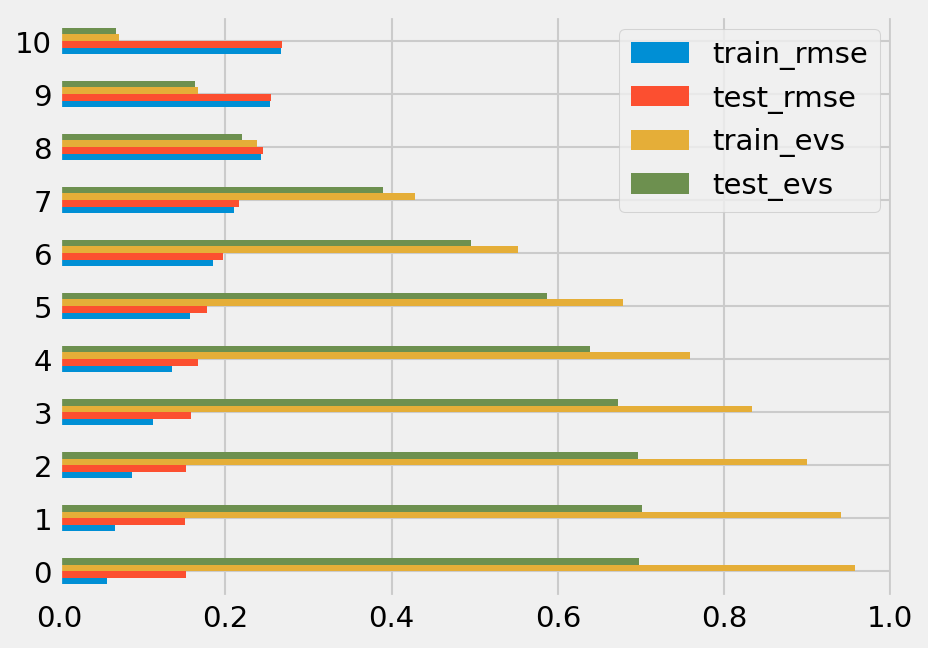

In [418]:
lasso_cv[["train_rmse", "test_rmse", "train_evs", "test_evs"]].plot.barh()

<Axes: >

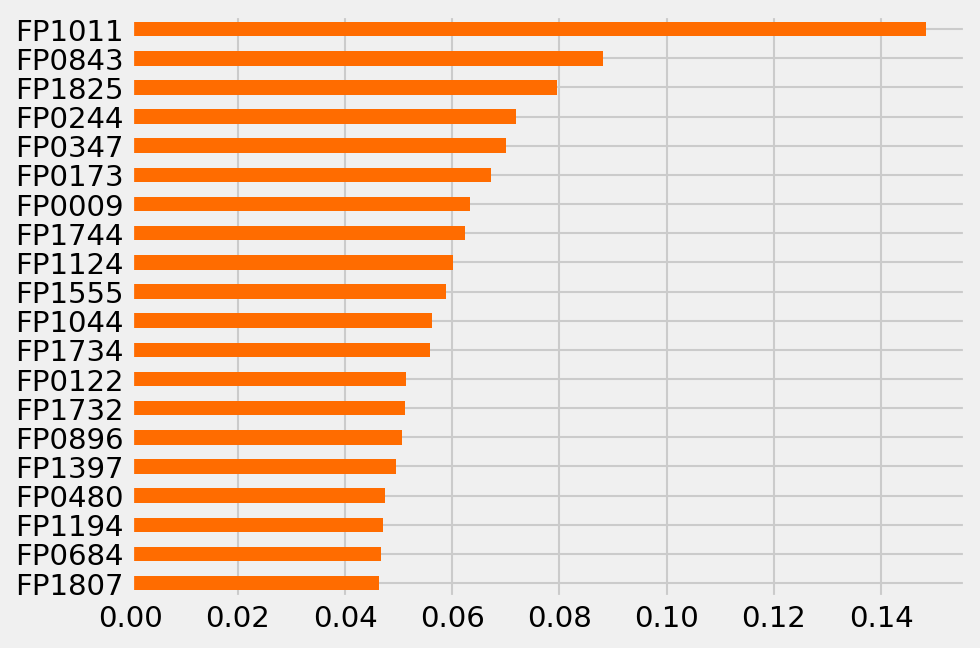

In [422]:
coefs_alpha = coef_df.iloc[4, :].abs().drop("alpha").T.sort_values(ascending=True)
subset = coefs_alpha[coefs_alpha != 0]
subset.tail(20).plot.barh(color="#FF6C00")

Text(0, 0.5, 'Explained Variance')

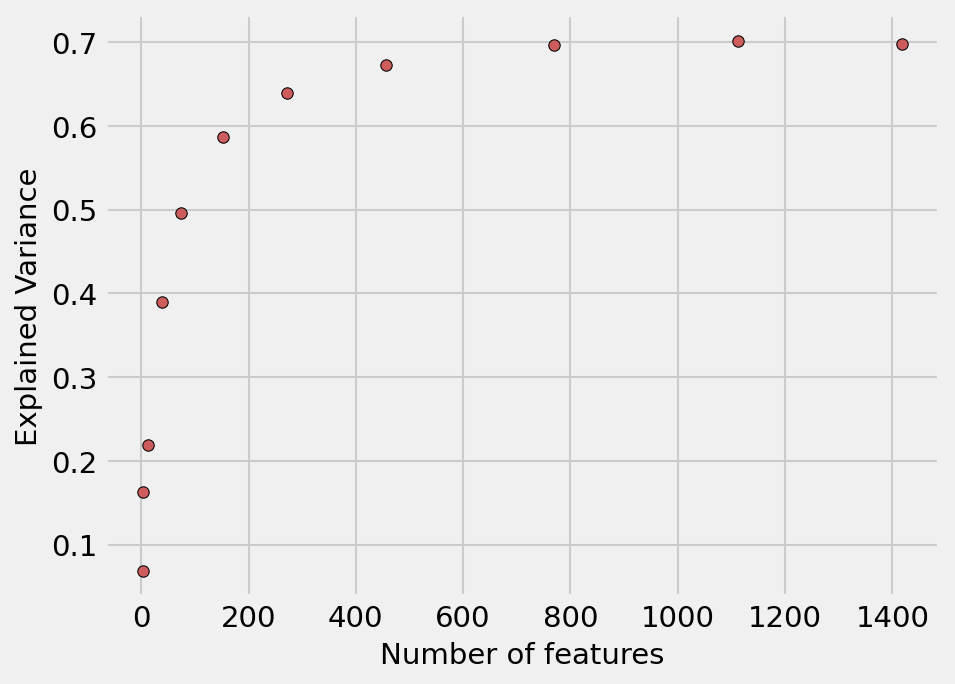

In [338]:
lasso_cv.plot.scatter(x="n_feats", y="test_evs", s=30, color="indianred", edgecolor="k")
plt.xlabel("Number of features", fontsize=14)
plt.ylabel("Explained Variance", fontsize=14)

# Residuals evaluation

In [476]:
X_train_simpcv, X_val_simpcv, y_train_simpcv, y_val_simpcv = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

lasso_features = subset.index.tolist()
X_train_simpcv = X_train_simpcv.loc[:, lasso_features]
X_val_simpcv = X_val_simpcv.loc[:, lasso_features]

svr_lasso_selected = SVR()
svr_lasso_selected.fit(X_train_simpcv, y_train_simpcv)

y_pred_lasso_svm = svr_lasso_selected.predict(X_val_simpcv)
y_train_pred_lasso_svm = svr_lasso_selected.predict(X_train_simpcv)

print(
    f"Train RMSE: {mean_squared_error(y_train_simpcv, y_train_pred_lasso_svm, squared=False):.3f}"
)
print(
    f"Test RMSE: {mean_squared_error(y_val_simpcv, y_pred_lasso_svm, squared=False):.3f}"
)

print(
    f"Train EVS: {explained_variance_score(y_train_simpcv, y_train_pred_lasso_svm):.3f}"
)
print(f"Test EVS: {explained_variance_score(y_val_simpcv, y_pred_lasso_svm):.3f}")

Train RMSE: 0.151
Test RMSE: 0.172
Train EVS: 0.705
Test EVS: 0.609


In [480]:
X_train_simpcv, X_val_simpcv, y_train_simpcv, y_val_simpcv = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

RF_features = (
    importances_unbiased.mean().sort_values(ascending=False).head(400).index.tolist()
)

X_train_simpcv = X_train_simpcv.loc[:, RF_features]
X_val_simpcv = X_val_simpcv.loc[:, RF_features]

svr_RF_selected = SVR()
svr_RF_selected.fit(X_train_simpcv, y_train_simpcv)

y_pred_rf_svm = svr_RF_selected.predict(X_val_simpcv)
y_train_pred_rf_svm = svr_RF_selected.predict(X_train_simpcv)

print(
    f"Train RMSE: {mean_squared_error(y_train_simpcv, y_train_pred_rf_svm, squared=False):.3f}"
)
print(
    f"Test RMSE: {mean_squared_error(y_val_simpcv, y_pred_rf_svm, squared=False):.3f}"
)

print(f"Train EVS: {explained_variance_score(y_train_simpcv, y_train_pred_rf_svm):.3f}")
print(f"Test EVS: {explained_variance_score(y_val_simpcv, y_pred_rf_svm):.3f}")

Train RMSE: 0.263
Test RMSE: 0.261
Train EVS: 0.102
Test EVS: 0.098


C:\Users\paro\AppData\Local\Temp\ipykernel_14756\2326417848.py:9: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(
C:\Users\paro\AppData\Local\Temp\ipykernel_14756\2326417848.py:32: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(


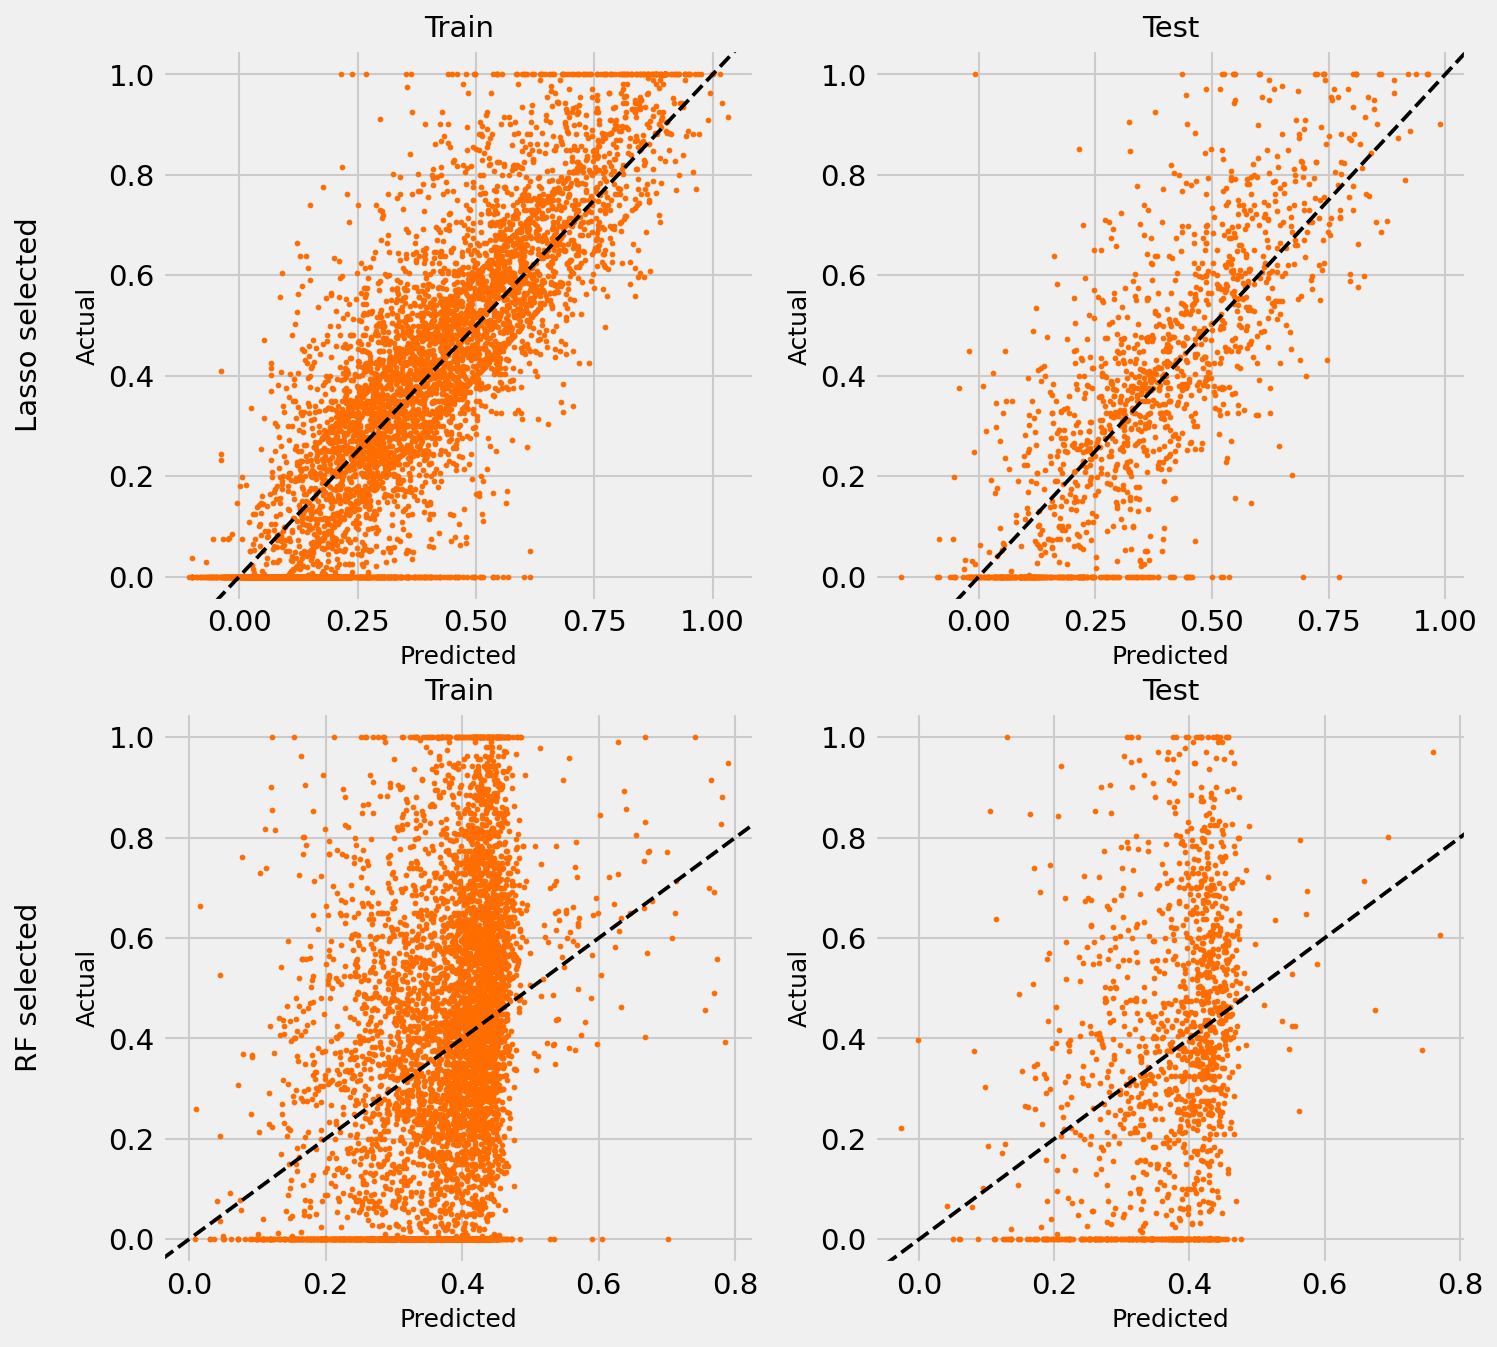

In [481]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_train_pred_lasso_svm, y_train_simpcv, s=5, c="#FF6C00")
plt.axline((0, 0), slope=1, color="black", linestyle="--", linewidth=1.8)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Train", fontsize=14)
plt.annotate(
    "Lasso selected",
    (-0.20, 0.5),
    xycoords="axes fraction",
    textcoords="offset points",
    va="center",
    ha="right",
    rotation=90,
)

plt.subplot(2, 2, 2)
plt.scatter(y_pred_lasso_svm, y_val_simpcv, s=5, c="#FF6C00")
plt.axline((0, 0), slope=1, color="black", linestyle="--", linewidth=1.8)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Test", fontsize=14)

plt.subplot(2, 2, 3)
plt.scatter(y_train_pred_rf_svm, y_train_simpcv, s=5, c="#FF6C00")
plt.axline((0, 0), slope=1, color="black", linestyle="--", linewidth=1.8)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Train", fontsize=14)
plt.annotate(
    "RF selected",
    (-0.20, 0.5),
    xycoords="axes fraction",
    textcoords="offset points",
    va="center",
    ha="right",
    rotation=90,
)

plt.subplot(2, 2, 4)
plt.scatter(y_pred_rf_svm, y_val_simpcv, s=5, c="#FF6C00")
plt.axline((0, 0), slope=1, color="black", linestyle="--", linewidth=1.8)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Test", fontsize=14)

plt.savefig("../figs/lasso_RF_svm.png", dpi=150, bbox_inches="tight")
plt.show()

In [483]:
X_ivs = pd.DataFrame(X_ivs, columns=col_names)
X_ivs = X_ivs.loc[:, lasso_features]

In [484]:
y_preds = svr_lasso_selected.predict(X_ivs)

In [485]:
y_preds

array([ 0.17861371,  0.50724902,  0.26681154,  0.22323473,  0.16334008,
       -0.05447514,  0.39283125,  0.71999521,  0.21043199,  0.74597663,
        0.49394993,  0.37300357,  0.5680813 ,  0.20334879,  0.27270289,
        0.12392413,  0.29857837,  0.30578864,  0.43880947, -0.08831254,
        0.88054411,  0.17690452,  0.46882658,  0.14552317,  0.1827568 ,
        0.36812829,  0.24390471,  0.20074596,  0.31258619,  0.1662128 ,
       -0.1005962 ,  0.31544175,  0.08896711,  0.50800374,  0.6739311 ,
        0.35741195,  0.19962633,  0.54281303,  0.35068206,  0.3263591 ,
        0.21601253, -0.01726081,  0.20280316,  0.46399519,  0.31013177,
        0.37854914,  0.74678184, -0.00762556,  0.39323872,  0.26906104,
        0.26925122,  0.25167787,  0.06125914,  0.29330145,  0.31384213,
        0.66265923,  0.56351018,  0.12942215,  0.47846878,  0.61556344,
        0.3320138 ,  0.56831752,  0.46844131,  0.42645445,  0.5827906 ,
        0.46366373,  0.43381658,  0.38435188,  0.33247448,  0.08

In [488]:
with open("../data/01.txt", "w") as fp:
    for i in y_preds:
        fp.write(str(i) + "\n")